# 1 ProgrammierungderAD/DA-Wandlerkarte
```python
import redlabasrl print("-------einzelne Werte-------------------------")
print("16 Bit Value: "+str(rl.cbAIn(0,0,1)))
print("Voltage Value: "+str(rl.cbVIn(0,0,1)))
print("-------Messreihe-------------------------")
print("Messreihe: "+str(rl.cbAInScan(0,0,0,300,8000,1) ))
print("Messreihe: "+str(rl.cbVInScan(0,0,0,300,8000,1) ))
print("Samplerate: "+str(rl.cbInScanRate(0,0,0,8000)))

print("-------Ausgabe-------------------------")
print("Voltage Value: "+str(rl.cbVOut(0,0,101,2.5)))
```

# 2 AD-Wandlung
## Messung Gleichspannungsquelle 1-10V (1V Schritten)
|Spannung[V]|hochgenaues Feinmessgerät[V]|Multimeter[V]|Oszilloskop[V]|AD-Wandler[V]|
|-----------|----------------------------|-------------|--------------|-------------|
|1          |1.041                       |1.033        |1.029         |1.035        |
|2          |2.049                       |2.034        |2.055         |2.041        |
|3          |3.056                       |3.033        |3.071         |3.047        |
|4          |4.066                       |4.06         |4.054         |4.053        |
|5          |5.075                       |5.07         |5.050         |5.068        |
|6          |6.037                       |6.04         |6.025         |6.035        |
|7          |7.046                       |7.04         |7.019         |7.061        |
|8          |8.056                       |8.06         |8.037         |8.047        |
|9          |9.067                       |9.07         |9.061         |9.063        |
|10         |10.077                      |10.08        |10.09         |9.990        |


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

In [2]:
Umax = 10
Umin = -10
n = 11
deltaU = (Umax - Umin) / 2**n
print("Quantisierungsfehler: " + str(deltaU * 1e3) + "mV")

Quantisierungsfehler: 9.765625mV


In [3]:
spannung = np.array([1,2,3,4,5,6,7,8,9,10])
feinmessgeraet = np.array([1.041, 2.049, 3.056, 4.066, 5.075, 6.037, 7.046, 8.056, 9.067, 10.077])
multimeter = np.array([1.033, 2.034, 3.033, 4.06, 5.07, 6.04, 7.04, 8.06, 9.07, 10.08])
adwandler = np.array([1.035, 2.041, 3.047, 4.053, 5.068, 6.045, 7.061, 8.047, 9.063, 9.990])
picoscope = np.array([1.029, 2.055, 3.071, 4.054, 5.050, 6.025, 7.019, 8.037, 9.061, 10.09])
adwandler_korrigiert = np.array([1.035, 2.041, 3.047, 4.053, 5.068, 6.045, 7.061, 8.047, 9.063])
feinmessgeraet_korrigiert = np.array([1.041, 2.049, 3.056, 4.066, 5.075, 6.037, 7.046, 8.056, 9.067])

messfehler_multimeter = feinmessgeraet - multimeter
messfehler_adwandler = feinmessgeraet - adwandler
messfehler_picoscope = feinmessgeraet - picoscope
messfehler_adwandler_korrigiert = feinmessgeraet_korrigiert - adwandler_korrigiert

faktor = 1 / 9
std_multimeter = np.sqrt(faktor * np.sum(messfehler_multimeter**2))
std_adwandler = np.sqrt(faktor * np.sum(messfehler_adwandler**2))
std_picoscope = np.sqrt(faktor * np.sum(messfehler_picoscope**2))
std_adwandler_korrigiert = np.sqrt(1 / 8 * np.sum(messfehler_adwandler_korrigiert**2))

print("Std von Multimeter: " + str(std_multimeter * 1e3) + "mV")
print("Std von A/D-Wandler: " + str(std_adwandler * 1e3) + "mV")
print("Std von Picoscope: " + str(std_picoscope * 1e3) + "mV")
print("Std von A/D-Wandler korrigiert: " + str(std_adwandler_korrigiert * 1e3) + "mV")

# Ad-Wandler arbeitet mit 11 bit, womit auf den Bereich [-10V;10V] eine Genauigkeit von 9,77mV gewährleistet werden kann.

Std von Multimeter: 10.31719169369492mV
Std von A/D-Wandler: 30.466739606039457mV
Std von Picoscope: 17.039170558842574mV
Std von A/D-Wandler korrigiert: 9.905806378079252mV


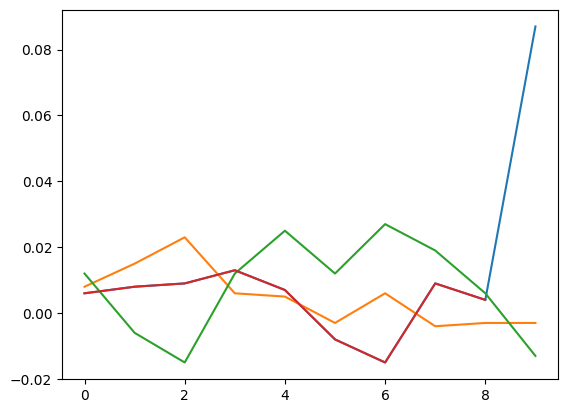

In [4]:
plt.plot(messfehler_adwandler)
plt.plot(messfehler_multimeter)
plt.plot(messfehler_picoscope)
plt.plot(messfehler_adwandler_korrigiert)

# 3 DA-Wandlung
## Messung Gleichspannungsquelle 0.5-5V (0.5V Schritten)
|Spannung[V]|Oszilloskop[V]|
|-----------|--------------|
|0.5        |0.550         |
|1.0        |0.936         |
|1.5        |1.495         |
|2.0        |2.056         |
|2.5        |2.466         |
|3.0        |2.991         |
|3.5        |3.552         |
|4.0        |4.075         |
|4.5        |4.487         |
|5.0        |5.047         |

In [5]:
deltaUda = 5 / 2**10
print("theor. Quantisierungsfehler D/A-Wander: " + str(deltaUda * 1e3) + "mV")

theor. Quantisierungsfehler D/A-Wander: 4.8828125mV


In [6]:
spannung_da = np.array([0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5])
picoscope = np.array([0.550, 0.936, 1.495, 2.056, 2.466, 2.991, 3.552, 4.075, 4.487, 5.047])

messfehler_picoscope = spannung_da - picoscope

faktor = 1 / 9
std_picoscope = np.sqrt(faktor * np.sum(messfehler_picoscope**2))
print("Messfehler Picoscope zu Eingabe: " + str(std_picoscope * 1e3) + "mV")
print("Verhältnis Messfehler zu theor. QF: " + str(std_picoscope / deltaUda))

Messfehler Picoscope zu Eingabe: 49.10419760287527mV
Verhältnis Messfehler zu theor. QF: 10.056539669068854


# 4 ZeitverhaltenderDA-Wandlung
```python
import time
import math
import redlab as rlnnung
def generate_sine_wandlers
    sampling_rate =mal 100 Samples pro Sekunde
    num_amplitudes = 50  # Anzahl der Amplitudenstufen pro Sinusschwingunchnung der Schrittgröße für die Sinusspannung
    step = 2 * math.pi / num_amplitudes

    while True:
        for i in range(nr jede Amplitude
            voltage = math.s auf den DA-Wandler
            print("Voltage Value: " + str(voltage))
            rl.cbVOutaltung der Samplingrate
            time.slnerierung der Sinusspnung
generate_sine_wave()
spannung
generate_sine_wave()

```

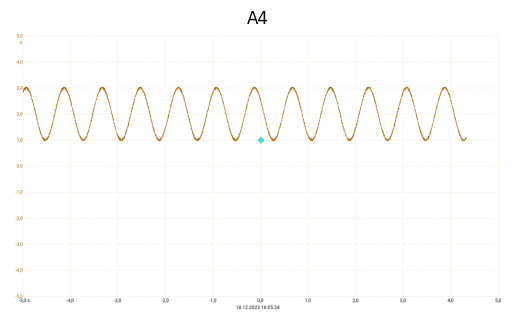

In [7]:
image = cv.imread("A4_messung/A4Messung.png")
fig, ax = plt.subplots()
ax.imshow(image)
ax.set_title("A4")
plt.axis('off')
plt.show()

# 5 Abtasttheorem
Abtastfrequenz: 7000Hz
Nyquist-Frequenz: 3500Hz
Halbe Nyquist-Frequenz: 1750Hz
Messschritte: 1750, 2625, 3500, 4375, 5250, 6125 7000
```python
import redlab as rl

array = str(rl.cbVInScan(0,0,0,1000,7000,1))
print("Messreihe: " + array)
file = open("A5_7000.txt", "w+")
file.write(array)
file.close()
```

(1000,)


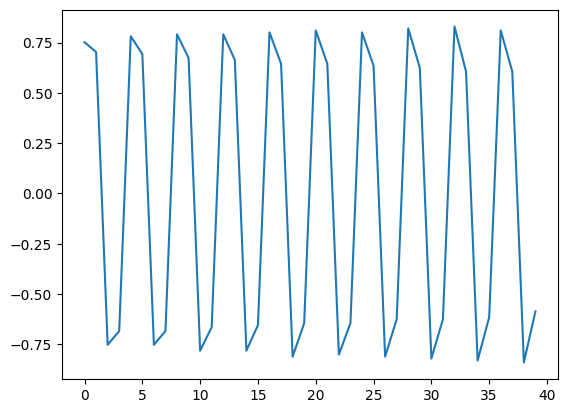

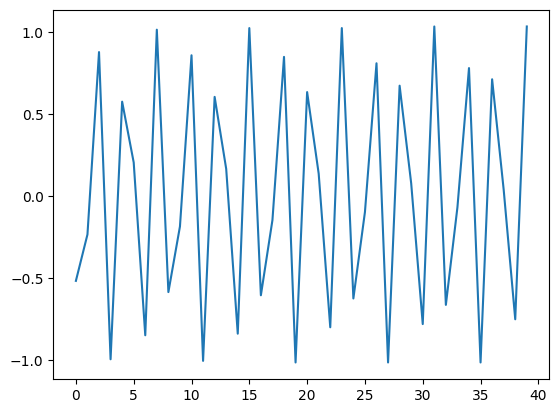

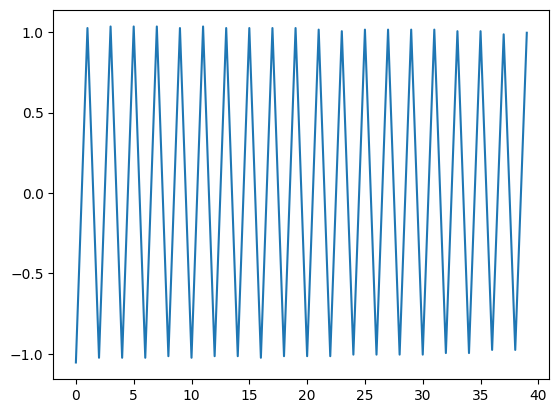

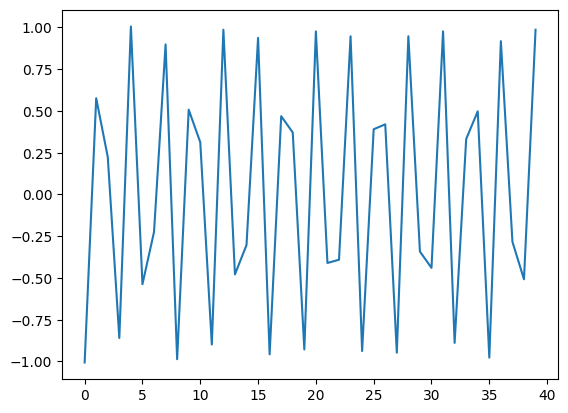

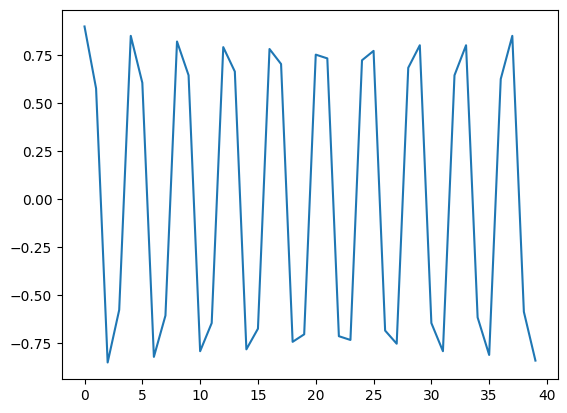

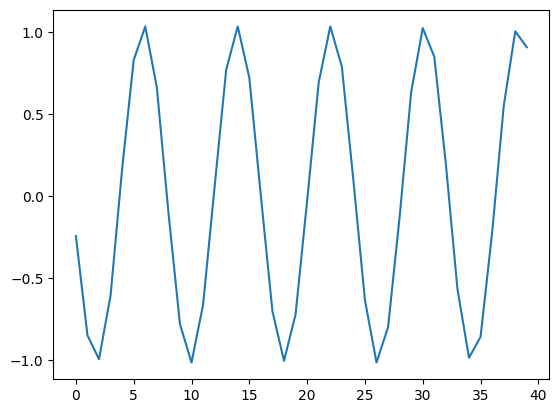

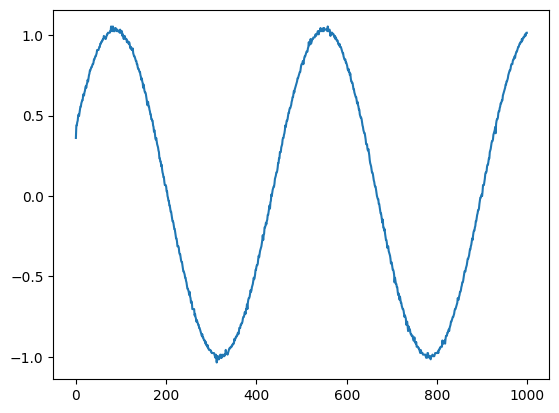

In [12]:
# file = open("A5/A5_7000.txt", "r")
# data_7000 = np.array(file.read())
data_1750 = np.array([0.751953125, 0.703125, -0.751953125, -0.68359375, 0.78125, 0.693359375, -0.751953125, -0.68359375, 0.791015625, 0.673828125, -0.78125, -0.6640625, 0.791015625, 0.6640625, -0.78125, -0.654296875, 0.80078125, 0.64453125, -0.810546875, -0.64453125, 0.810546875, 0.64453125, -0.80078125, -0.64453125, 0.80078125, 0.634765625, -0.810546875, -0.625, 0.8203125, 0.625, -0.8203125, -0.625, 0.830078125, 0.60546875, -0.830078125, -0.615234375, 0.810546875, 0.60546875, -0.83984375, -0.5859375, 0.859375, 0.595703125, -0.83984375, -0.576171875, 0.869140625, 0.5859375, -0.849609375, -0.56640625, 0.888671875, 0.56640625, -0.859375, -0.556640625, 0.869140625, 0.556640625, -0.87890625, -0.556640625, 0.87890625, 0.537109375, -0.869140625, -0.52734375, 0.859375, 0.537109375, -0.87890625, -0.517578125, 0.8984375, 0.52734375, -0.927734375, -0.5078125, 0.908203125, 0.5078125, -0.908203125, -0.48828125, 0.908203125, 0.498046875, -0.908203125, -0.478515625, 0.908203125, 0.478515625, -0.91796875, -0.46875, 0.927734375, 0.478515625, -0.908203125, -0.458984375, 0.9375, 0.478515625, -0.91796875, -0.439453125, 0.9375, 0.44921875, -0.927734375, -0.4296875, 0.9375, 0.439453125, -0.9375, -0.419921875, 0.947265625, 0.419921875, -0.947265625, -0.41015625, 0.947265625, 0.400390625, -0.9375, -0.390625, 0.947265625, 0.400390625, -0.9375, -0.380859375, 0.966796875, 0.380859375, -0.95703125, -0.37109375, 0.966796875, 0.380859375, -0.947265625, -0.3515625, 0.9765625, 0.361328125, -0.966796875, -0.341796875, 0.9765625, 0.3515625, -0.966796875, -0.33203125, 0.9765625, 0.33203125, -0.9765625, -0.3125, 0.986328125, 0.322265625, -0.966796875, -0.3125, 0.99609375, 0.3125, -0.9765625, -0.283203125, 0.99609375, 0.302734375, -1.015625, -0.283203125, 0.99609375, 0.283203125, -0.986328125, -0.263671875, 1.005859375, 0.2734375, -0.986328125, -0.25390625, 0.9765625, 0.25390625, -1.005859375, -0.244140625, 1.005859375, 0.224609375, -0.99609375, -0.234375, 1.015625, 0.21484375, -0.99609375, -0.205078125, 1.015625, 0.205078125, -1.005859375, -0.1953125, 1.015625, 0.185546875, -1.015625, -0.185546875, 1.025390625, 0.17578125, -1.005859375, -0.166015625, 1.015625, 0.166015625, -1.015625, -0.15625, 1.015625, 0.13671875, -1.015625, -0.146484375, 1.025390625, 0.13671875, -1.015625, -0.126953125, 1.025390625, 0.1171875, -1.015625, -0.1171875, 1.025390625, 0.107421875, -1.015625, -0.09765625, 1.03515625, 0.087890625, -1.015625, -0.078125, 1.005859375, 0.078125, -1.015625, -0.078125, 1.0546875, 0.068359375, -1.015625, -0.05859375, 1.03515625, 0.048828125, -1.025390625, -0.048828125, 1.025390625, 0.029296875, -1.025390625, -0.029296875, 1.03515625, 0.01953125, -1.025390625, -0.01953125, 1.03515625, 0.009765625, -1.03515625, 0.0, 1.03515625, 0.0, -1.025390625, 0.0, 1.025390625, -0.01953125, -1.03515625, 0.009765625, 1.03515625, -0.0390625, -1.025390625, 0.0390625, 1.03515625, -0.048828125, -1.015625, 0.048828125, 1.025390625, -0.068359375, -1.025390625, 0.068359375, 1.025390625, -0.078125, -1.03515625, 0.078125, 1.03515625, -0.087890625, -1.015625, 0.087890625, 1.03515625, -0.09765625, -1.015625, 0.107421875, 1.025390625, -0.1171875, -1.025390625, 0.1171875, 1.015625, -0.126953125, -1.015625, 0.13671875, 1.015625, -0.146484375, -1.015625, 0.146484375, 1.025390625, -0.15625, -1.005859375, 0.15625, 1.015625, -0.166015625, -1.005859375, 0.166015625, 1.015625, -0.185546875, -1.015625, 0.17578125, 1.015625, -0.1953125, -1.005859375, 0.1953125, 1.015625, -0.205078125, -0.99609375, 0.224609375, 1.015625, -0.224609375, -0.99609375, 0.234375, 1.015625, -0.234375, -0.99609375, 0.25390625, 1.005859375, -0.25390625, -1.015625, 0.263671875, 1.005859375, -0.263671875, -0.986328125, 0.283203125, 0.99609375, -0.2734375, -0.986328125, 0.29296875, 0.986328125, -0.283203125, -0.986328125, 0.3125, 0.99609375, -0.302734375, -0.9765625, 0.322265625, 0.986328125, -0.3125, -0.99609375, 0.33203125, 0.986328125, -0.322265625, -0.966796875, 0.3515625, 0.9765625, -0.33203125, -0.95703125, 0.361328125, 0.9765625, -0.361328125, -0.95703125, 0.361328125, 0.966796875, -0.37109375, -0.947265625, 0.380859375, 0.966796875, -0.380859375, -0.95703125, 0.390625, 0.947265625, -0.390625, -0.947265625, 0.400390625, 0.95703125, -0.41015625, -0.947265625, 0.4296875, 0.947265625, -0.419921875, -0.9375, 0.439453125, 0.947265625, -0.4296875, -0.91796875, 0.458984375, 0.9375, -0.439453125, -0.91796875, 0.458984375, 0.9375, -0.44921875, -0.908203125, 0.478515625, 0.927734375, -0.46875, -0.908203125, 0.48828125, 0.91796875, -0.478515625, -0.87890625, 0.498046875, 0.91796875, -0.498046875, -0.8984375, 0.5078125, 0.908203125, -0.5078125, -0.87890625, 0.517578125, 0.8984375, -0.52734375, -0.87890625, 0.537109375, 0.8984375, -0.537109375, -0.87890625, 0.537109375, 0.888671875, -0.546875, -0.869140625, 0.556640625, 0.87890625, -0.556640625, -0.859375, 0.576171875, 0.869140625, -0.56640625, -0.849609375, 0.595703125, 0.859375, -0.576171875, -0.83984375, 0.595703125, 0.859375, -0.5859375, -0.83984375, 0.60546875, 0.83984375, -0.60546875, -0.830078125, 0.60546875, 0.830078125, -0.615234375, -0.8203125, 0.625, 0.8203125, -0.625, -0.810546875, 0.634765625, 0.810546875, -0.634765625, -0.78125, 0.634765625, 0.810546875, -0.634765625, -0.791015625, 0.6640625, 0.80078125, -0.64453125, -0.791015625, 0.6640625, 0.791015625, -0.6640625, -0.78125, 0.673828125, 0.78125, -0.68359375, -0.78125, 0.693359375, 0.771484375, -0.693359375, -0.751953125, 0.693359375, 0.751953125, -0.703125, -0.751953125, 0.703125, 0.751953125, -0.703125, -0.7421875, 0.712890625, 0.7421875, -0.72265625, -0.7421875, 0.72265625, 0.732421875, -0.72265625, -0.712890625, 0.7421875, 0.72265625, -0.7421875, -0.712890625, 0.751953125, 0.712890625, -0.751953125, -0.703125, 0.751953125, 0.703125, -0.76171875, -0.703125, 0.76171875, 0.693359375, -0.771484375, -0.693359375, 0.78125, 0.68359375, -0.78125, -0.68359375, 0.78125, 0.673828125, -0.78125, -0.654296875, 0.791015625, 0.6640625, -0.791015625, -0.673828125, 0.80078125, 0.64453125, -0.791015625, -0.634765625, 0.8203125, 0.64453125, -0.80078125, -0.625, 0.8203125, 0.634765625, -0.8203125, -0.595703125, 0.8203125, 0.625, -0.830078125, -0.60546875, 0.830078125, 0.615234375, -0.830078125, -0.5859375, 0.83984375, 0.615234375, -0.83984375, -0.5859375, 0.849609375, 0.595703125, -0.849609375, -0.56640625, 0.859375, 0.56640625, -0.859375, -0.556640625, 0.87890625, 0.56640625, -0.859375, -0.546875, 0.87890625, 0.556640625, -0.869140625, -0.537109375, 0.888671875, 0.52734375, -0.87890625, -0.517578125, 0.888671875, 0.517578125, -0.8984375, -0.517578125, 0.908203125, 0.537109375, -0.888671875, -0.498046875, 0.908203125, 0.498046875, -0.908203125, -0.498046875, 0.908203125, 0.498046875, -0.8984375, -0.46875, 0.927734375, 0.498046875, -0.91796875, -0.458984375, 0.927734375, 0.46875, -0.91796875, -0.44921875, 0.9375, 0.458984375, -0.927734375, -0.439453125, 0.927734375, 0.439453125, -0.927734375, -0.419921875, 0.947265625, 0.439453125, -0.9375, -0.419921875, 0.947265625, 0.419921875, -0.947265625, -0.390625, 0.95703125, 0.41015625, -0.9375, -0.361328125, 0.95703125, 0.390625, -0.95703125, -0.37109375, 0.966796875, 0.390625, -0.95703125, -0.361328125, 0.966796875, 0.361328125, -0.95703125, -0.322265625, 0.9765625, 0.361328125, -0.966796875, -0.33203125, 0.9765625, 0.341796875, -0.9765625, -0.33203125, 0.9765625, 0.322265625, -0.9765625, -0.302734375, 0.986328125, 0.3125, -0.9765625, -0.3125, 0.986328125, 0.29296875, -0.986328125, -0.283203125, 0.99609375, 0.29296875, -0.986328125, -0.2734375, 1.005859375, 0.283203125, -0.986328125, -0.25390625, 1.005859375, 0.263671875, -0.99609375, -0.234375, 1.005859375, 0.234375, -0.99609375, -0.234375, 1.015625, 0.234375, -0.99609375, -0.21484375, 1.015625, 0.21484375, -1.005859375, -0.1953125, 1.015625, 0.1953125, -1.005859375, -0.1953125, 1.025390625, 0.185546875, -1.005859375, -0.17578125, 1.015625, 0.166015625, -1.015625, -0.15625, 1.025390625, 0.126953125, -1.015625, -0.146484375, 1.025390625, 0.146484375, -1.015625, -0.146484375, 1.015625, 0.1171875, -1.015625, -0.1171875, 1.025390625, 0.1171875, -1.015625, -0.09765625, 1.025390625, 0.09765625, -1.025390625, -0.09765625, 1.015625, 0.087890625, -1.025390625, -0.078125, 1.025390625, 0.068359375, -1.025390625, -0.068359375, 1.03515625, 0.05859375, -1.025390625, -0.048828125, 1.025390625, 0.0390625, -1.025390625, -0.0390625, 1.025390625, 0.029296875, -1.025390625, -0.01953125, 1.03515625, 0.01953125, -1.025390625, 0.0, 1.025390625, -0.009765625, -1.03515625, 0.009765625, 1.03515625, 0.009765625, -1.015625, 0.01953125, 1.025390625, -0.029296875, -1.015625, 0.0390625, 1.03515625, -0.0390625, -1.025390625, 0.0390625, 1.025390625, -0.0390625, -1.025390625, 0.05859375, 1.025390625, -0.068359375, -1.015625, 0.068359375, 1.03515625, -0.078125, -1.015625, 0.087890625, 1.025390625, -0.087890625, -1.025390625, 0.087890625, 1.025390625, -0.107421875, -1.015625, 0.1171875, 1.025390625, -0.1171875, -1.025390625, 0.1171875, 1.025390625, -0.13671875, -1.015625, 0.15625, 1.025390625, -0.146484375, -1.015625, 0.146484375, 1.015625, -0.15625, -1.015625, 0.17578125, 1.025390625, -0.185546875, -1.015625, 0.185546875, 1.025390625, -0.1953125, -1.005859375, 0.21484375, 1.015625, -0.1953125, -1.005859375, 0.234375, 1.015625, -0.224609375, -0.99609375, 0.234375, 1.005859375, -0.234375, -0.99609375, 0.234375, 1.005859375, -0.244140625, -0.986328125, 0.283203125, 1.005859375, -0.25390625, -0.986328125, 0.283203125, 0.99609375, -0.2734375, -0.99609375, 0.302734375, 0.99609375, -0.283203125, -0.9765625, 0.302734375, 0.986328125, -0.302734375, -0.9765625, 0.322265625, 0.986328125, -0.3125, -0.9765625, 0.3515625, 0.986328125, -0.322265625, -0.966796875, 0.33203125, 0.9765625, -0.33203125, -0.966796875, 0.33203125, 0.9765625, -0.341796875, -0.95703125, 0.37109375, 0.966796875, -0.361328125, -0.95703125, 0.361328125, 0.966796875, -0.380859375, -0.947265625, 0.400390625, 0.95703125, -0.390625, -0.947265625, 0.400390625, 0.95703125, -0.390625, -0.9375, 0.439453125, 0.947265625, -0.41015625, -0.9375, 0.439453125, 0.9375, -0.458984375, -0.927734375, 0.44921875, 0.947265625, -0.439453125, -0.927734375, 0.458984375, 0.927734375, -0.4296875, -0.927734375, 0.478515625, 0.927734375, -0.46875, -0.908203125, 0.48828125, 0.908203125, -0.478515625, -0.908203125, 0.498046875, 0.91796875, -0.52734375, -0.8984375, 0.517578125, 0.8984375, -0.5078125, -0.8984375, 0.517578125, 0.908203125, -0.5078125, -0.888671875, 0.537109375, 0.888671875, -0.52734375, -0.87890625, 0.556640625, 0.888671875, -0.537109375, -0.869140625, 0.556640625, 0.869140625, -0.546875, -0.859375, 0.56640625, 0.869140625, -0.556640625, -0.859375, 0.595703125, 0.859375, -0.576171875, -0.849609375, 0.5859375, 0.849609375, -0.60546875, -0.83984375, 0.60546875, 0.849609375, -0.595703125, -0.830078125, 0.615234375, 0.830078125, -0.595703125, -0.830078125, 0.625, 0.830078125, -0.625, -0.8203125, 0.634765625, 0.8203125, -0.634765625, -0.8203125, 0.634765625, 0.80078125, -0.6640625, -0.80078125, 0.654296875, 0.791015625, -0.654296875, -0.791015625, 0.634765625, 0.791015625, -0.654296875, -0.78125, 0.6640625, 0.78125, -0.673828125, -0.78125, 0.693359375, 0.771484375, -0.68359375, -0.771484375, 0.693359375, 0.76171875, -0.693359375, -0.76171875, 0.712890625, 0.76171875, -0.703125, -0.7421875, 0.712890625, 0.7421875, -0.703125, -0.732421875, 0.72265625, 0.7421875, -0.72265625, -0.72265625, 0.732421875, 0.72265625, -0.7421875, -0.712890625, 0.751953125, 0.712890625, -0.7421875, -0.703125, 0.751953125, 0.703125, -0.751953125, -0.693359375, 0.76171875, 0.703125, -0.76171875, -0.68359375, 0.78125, 0.68359375, -0.76171875, -0.68359375, 0.791015625, 0.68359375, -0.78125, -0.6640625, 0.791015625, 0.6640625, -0.78125, -0.64453125, 0.810546875, 0.6640625, -0.791015625, -0.634765625, 0.8203125, 0.64453125, -0.830078125, -0.634765625, 0.8203125, 0.634765625, -0.810546875, -0.615234375, 0.830078125, 0.634765625, -0.8203125, -0.615234375, 0.83984375, 0.60546875, -0.830078125, -0.595703125, 0.849609375, 0.60546875, -0.830078125, -0.5859375, 0.830078125, 0.5859375, -0.849609375, -0.576171875, 0.869140625, 0.5859375, -0.849609375, -0.56640625, 0.83984375, 0.556640625, -0.859375, -0.556640625, 0.87890625, 0.556640625, -0.859375, -0.537109375, 0.87890625, 0.546875, -0.87890625, -0.537109375, 0.859375, 0.517578125, -0.87890625, -0.517578125, 0.8984375, 0.517578125, -0.888671875, -0.5078125, 0.91796875, 0.5078125])
print(data_1750.shape)
plt.plot(data_1750[:40])
plt.show()
data_2625 = np.array([-0.517578125, -0.234375, 0.87890625, -0.99609375, 0.576171875, 0.205078125, -0.849609375, 1.015625, -0.5859375, -0.185546875, 0.859375, -1.005859375, 0.60546875, 0.166015625, -0.83984375, 1.025390625, -0.60546875, -0.146484375, 0.849609375, -1.015625, 0.634765625, 0.13671875, -0.80078125, 1.025390625, -0.625, -0.09765625, 0.810546875, -1.015625, 0.673828125, 0.078125, -0.78125, 1.03515625, -0.6640625, -0.068359375, 0.78125, -1.015625, 0.712890625, 0.0390625, -0.751953125, 1.03515625, -0.693359375, -0.01953125, 0.751953125, -1.025390625, 0.751953125, 0.0, -0.712890625, 1.03515625, -0.732421875, 0.01953125, 0.72265625, -1.025390625, 0.76171875, -0.0390625, -0.693359375, 1.03515625, -0.76171875, 0.068359375, 0.712890625, -1.015625, 0.791015625, -0.078125, -0.64453125, 1.03515625, -0.771484375, 0.107421875, 0.654296875, -1.015625, 0.8203125, -0.1171875, -0.615234375, 1.025390625, -0.8203125, 0.13671875, 0.634765625, -1.005859375, 0.830078125, -0.166015625, -0.595703125, 1.025390625, -0.830078125, 0.185546875, 0.595703125, -1.015625, 0.869140625, -0.205078125, -0.576171875, 1.015625, -0.859375, 0.224609375, 0.556640625, -0.99609375, 0.888671875, -0.244140625, -0.52734375, 1.005859375, -0.87890625, 0.283203125, 0.517578125, -0.986328125, 0.908203125, -0.29296875, -0.48828125, 0.986328125, -0.8984375, 0.322265625, 0.5078125, -0.9765625, 0.9375, -0.3125, -0.458984375, 0.9765625, -0.9375, 0.341796875, 0.4296875, -0.95703125, 0.95703125, -0.361328125, -0.41015625, 0.95703125, -0.9375, 0.400390625, 0.41015625, -0.947265625, 0.95703125, -0.41015625, -0.37109375, 0.947265625, -0.95703125, 0.4296875, 0.37109375, -0.9375, 0.947265625, -0.439453125, -0.33203125, 0.927734375, -0.966796875, 0.46875, 0.322265625, -0.908203125, 0.986328125, -0.478515625, -0.29296875, 0.908203125, -0.9765625, 0.498046875, 0.29296875, -0.8984375, 0.986328125, -0.5078125, -0.25390625, 0.888671875, -0.986328125, 0.537109375, 0.25390625, -0.869140625, 1.015625, -0.546875, -0.224609375, 0.869140625, -0.99609375, 0.576171875, 0.1953125, -0.859375, 1.015625, -0.5859375, -0.15625, 0.849609375, -1.015625, 0.615234375, 0.15625, -0.8203125, 1.025390625, -0.615234375, -0.15625, 0.8203125, -1.015625, 0.634765625, 0.1171875, -0.791015625, 1.03515625, -0.654296875, -0.078125, 0.791015625, -1.015625, 0.673828125, 0.068359375, -0.78125, 1.03515625, -0.673828125, -0.048828125, 0.771484375, -1.025390625, 0.712890625, 0.029296875, -0.7421875, 1.044921875, -0.712890625, -0.0390625, 0.7421875, -1.025390625, 0.732421875, 0.0, -0.72265625, 1.03515625, -0.7421875, 0.029296875, 0.703125, -1.025390625, 0.771484375, -0.029296875, -0.693359375, 1.03515625, -0.78125, 0.068359375, 0.68359375, -1.015625, 0.791015625, -0.087890625, -0.654296875, 1.03515625, -0.791015625, 0.1171875, 0.64453125, -1.015625, 0.8203125, -0.13671875, -0.615234375, 1.025390625, -0.830078125, 0.166015625, 0.615234375, -1.005859375, 0.849609375, -0.166015625, -0.595703125, 1.015625, -0.83984375, 0.205078125, 0.5859375, -0.99609375, 0.869140625, -0.21484375, -0.556640625, 0.9765625, -0.869140625, 0.234375, 0.556640625, -0.99609375, 0.888671875, -0.25390625, -0.517578125, 1.005859375, -0.87890625, 0.29296875, 0.5078125, -0.966796875, 0.908203125, -0.29296875, -0.46875, 0.986328125, -0.908203125, 0.322265625, 0.478515625, -0.966796875, 0.9375, -0.33203125, -0.44921875, 0.9765625, -0.927734375, 0.361328125, 0.439453125, -0.95703125, 0.947265625, -0.361328125, -0.400390625, 0.95703125, -0.9375, 0.400390625, 0.400390625, -0.9375, 0.966796875, -0.439453125, -0.37109375, 0.95703125, -0.95703125, 0.458984375, 0.361328125, -0.91796875, 0.9765625, -0.44921875, -0.322265625, 0.927734375, -0.9765625, 0.478515625, 0.3125, -0.908203125, 0.986328125, -0.48828125, -0.283203125, 0.91796875, -0.986328125, 0.5078125, 0.283203125, -0.87890625, 1.005859375, -0.517578125, -0.244140625, 0.908203125, -0.99609375, 0.556640625, 0.234375, -0.83984375, 1.015625, -0.556640625, -0.205078125, 0.869140625, -1.005859375, 0.5859375, 0.1953125, -0.83984375, 1.015625, -0.5859375, -0.15625, 0.849609375, -1.015625, 0.625, 0.146484375, -0.8203125, 1.025390625, -0.625, -0.126953125, 0.8203125, -1.015625, 0.654296875, 0.107421875, -0.791015625, 1.025390625, -0.654296875, -0.087890625, 0.791015625, -1.015625, 0.68359375, 0.068359375, -0.76171875, 1.025390625, -0.68359375, -0.0390625, 0.751953125, -1.025390625, 0.712890625, 0.01953125, -0.732421875, 1.03515625, -0.712890625, 0.0, 0.7421875, -1.015625, 0.751953125, -0.009765625, -0.703125, 1.025390625, -0.7421875, 0.0390625, 0.703125, -1.015625, 0.771484375, -0.068359375, -0.673828125, 1.03515625, -0.78125, 0.078125, 0.68359375, -1.025390625, 0.80078125, -0.1171875, -0.64453125, 1.025390625, -0.80078125, 0.1171875, 0.634765625, -1.015625, 0.849609375, -0.146484375, -0.615234375, 1.015625, -0.8203125, 0.166015625, 0.615234375, -1.015625, 0.849609375, -0.185546875, -0.5859375, 1.015625, -0.849609375, 0.21484375, 0.576171875, -1.005859375, 0.87890625, -0.224609375, -0.546875, 1.005859375, -0.869140625, 0.25390625, 0.537109375, -0.986328125, 0.8984375, -0.263671875, -0.5078125, 0.986328125, -0.888671875, 0.302734375, 0.5078125, -0.9765625, 0.91796875, -0.3125, -0.46875, 0.9765625, -0.927734375, 0.33203125, 0.46875, -0.95703125, 0.9375, -0.3515625, -0.4296875, 0.966796875, -0.9375, 0.380859375, 0.419921875, -0.947265625, 0.95703125, -0.380859375, -0.380859375, 0.95703125, -0.9375, 0.41015625, 0.37109375, -0.947265625, 0.966796875, -0.419921875, -0.3515625, 0.947265625, -0.95703125, 0.44921875, 0.3515625, -0.91796875, 0.9765625, -0.44921875, -0.3125, 0.927734375, -0.9765625, 0.48828125, 0.3125, -0.908203125, 1.005859375, -0.498046875, -0.2734375, 0.908203125, -1.005859375, 0.52734375, 0.2734375, -0.87890625, 0.986328125, -0.537109375, -0.244140625, 0.87890625, -0.986328125, 0.56640625, 0.234375, -0.859375, 1.015625, -0.56640625, -0.1953125, 0.849609375, -0.99609375, 0.595703125, 0.185546875, -0.830078125, 1.025390625, -0.595703125, -0.15625, 0.830078125, -1.015625, 0.625, 0.13671875, -0.810546875, 1.044921875, -0.625, -0.107421875, 0.810546875, -1.015625, 0.654296875, 0.087890625, -0.78125, 1.025390625, -0.6640625, -0.068359375, 0.78125, -1.015625, 0.693359375, 0.01953125, -0.76171875, 1.025390625, -0.712890625, -0.0390625, 0.751953125, -1.025390625, 0.712890625, 0.009765625, -0.72265625, 1.03515625, -0.72265625, 0.009765625, 0.72265625, -1.015625, 0.751953125, -0.029296875, -0.703125, 1.03515625, -0.751953125, 0.05859375, 0.68359375, -1.015625, 0.78125, -0.05859375, -0.6640625, 1.03515625, -0.78125, 0.09765625, 0.6640625, -1.015625, 0.810546875, -0.107421875, -0.634765625, 1.03515625, -0.810546875, 0.15625, 0.634765625, -1.015625, 0.830078125, -0.126953125, -0.595703125, 1.025390625, -0.830078125, 0.185546875, 0.595703125, -1.005859375, 0.859375, -0.1953125, -0.56640625, 1.025390625, -0.859375, 0.21484375, 0.56640625, -0.986328125, 0.888671875, -0.234375, -0.52734375, 1.015625, -0.87890625, 0.2734375, 0.517578125, -0.986328125, 0.8984375, -0.283203125, -0.498046875, 0.986328125, -0.8984375, 0.3125, 0.48828125, -0.966796875, 0.927734375, -0.3125, -0.458984375, 0.986328125, -0.91796875, 0.341796875, 0.458984375, -0.95703125, 0.947265625, -0.3515625, -0.419921875, 0.966796875, -0.9375, 0.390625, 0.41015625, -0.947265625, 0.95703125, -0.390625, -0.380859375, 0.947265625, -0.95703125, 0.419921875, 0.380859375, -0.9375, 0.966796875, -0.4296875, -0.3515625, 0.9375, -0.9765625, 0.458984375, 0.33203125, -0.9375, 0.986328125, -0.46875, -0.3125, 0.908203125, -0.986328125, 0.478515625, 0.302734375, -0.8984375, 0.99609375, -0.5078125, -0.2734375, 0.8984375, -0.99609375, 0.537109375, 0.263671875, -0.869140625, 1.005859375, -0.546875, -0.224609375, 0.869140625, -1.005859375, 0.56640625, 0.205078125, -0.849609375, 1.015625, -0.576171875, -0.185546875, 0.859375, -1.015625, 0.60546875, 0.166015625, -0.830078125, 1.015625, -0.60546875, -0.146484375, 0.8203125, -1.015625, 0.634765625, 0.126953125, -0.80078125, 1.025390625, -0.64453125, -0.09765625, 0.80078125, -1.015625, 0.6640625, 0.078125, -0.78125, 1.025390625, -0.68359375, -0.068359375, 0.771484375, -1.015625, 0.703125, 0.0390625, -0.7421875, 1.03515625, -0.703125, -0.01953125, 0.751953125, -1.025390625, 0.732421875, 0.0, -0.712890625, 1.03515625, -0.7421875, 0.029296875, 0.712890625, -1.025390625, 0.751953125, -0.0390625, -0.68359375, 1.03515625, -0.791015625, 0.068359375, 0.68359375, -1.015625, 0.791015625, -0.087890625, -0.64453125, 1.025390625, -0.791015625, 0.1171875, 0.6640625, -1.015625, 0.8203125, -0.126953125, -0.625, 1.025390625, -0.8203125, 0.13671875, 0.625, -1.015625, 0.849609375, -0.166015625, -0.595703125, 1.025390625, -0.83984375, 0.185546875, 0.5859375, -1.015625, 0.87890625, -0.1953125, -0.546875, 1.005859375, -0.859375, 0.234375, 0.556640625, -0.99609375, 0.8984375, -0.244140625, -0.517578125, 1.005859375, -0.87890625, 0.283203125, 0.52734375, -0.9765625, 0.91796875, -0.283203125, -0.46875, 0.9765625, -0.908203125, 0.322265625, 0.478515625, -0.9765625, 0.9375, -0.322265625, -0.44921875, 0.986328125, -0.927734375, 0.3515625, 0.44921875, -0.95703125, 0.947265625, -0.3515625, -0.400390625, 0.966796875, -0.9375, 0.390625, 0.400390625, -0.947265625, 0.95703125, -0.419921875, -0.380859375, 0.947265625, -0.95703125, 0.4296875, 0.361328125, -0.927734375, 0.9765625, -0.439453125, -0.322265625, 0.91796875, -0.9765625, 0.478515625, 0.322265625, -0.908203125, 0.986328125, -0.478515625, -0.29296875, 0.8984375, -0.9765625, 0.517578125, 0.302734375, -0.888671875, 1.005859375, -0.5078125, -0.25390625, 0.888671875, -0.986328125, 0.556640625, 0.234375, -0.869140625, 1.015625, -0.546875, -0.21484375, 0.869140625, -1.005859375, 0.576171875, 0.1953125, -0.83984375, 1.025390625, -0.595703125, -0.17578125, 0.83984375, -1.015625, 0.615234375, 0.146484375, -0.8203125, 1.025390625, -0.625, -0.126953125, 0.8203125, -1.015625, 0.64453125, 0.107421875, -0.80078125, 1.025390625, -0.64453125, -0.087890625, 0.791015625, -1.005859375, 0.673828125, 0.068359375, -0.78125, 1.03515625, -0.693359375, -0.029296875, 0.771484375, -1.025390625, 0.703125, 0.0390625, -0.7421875, 1.025390625, -0.712890625, -0.009765625, 0.7421875, -1.025390625, 0.732421875, -0.009765625, -0.712890625, 1.03515625, -0.7421875, 0.029296875, 0.703125, -1.025390625, 0.76171875, -0.05859375, -0.693359375, 1.025390625, -0.771484375, 0.078125, 0.6640625, -1.044921875, 0.80078125, -0.087890625, -0.64453125, 1.025390625, -0.810546875, 0.1171875, 0.64453125, -1.015625, 0.8203125, -0.13671875, -0.625, 1.025390625, -0.8203125, 0.166015625, 0.615234375, -1.015625, 0.83984375, -0.17578125, -0.5859375, 1.025390625, -0.849609375, 0.1953125, 0.576171875, -1.005859375, 0.869140625, -0.205078125, -0.546875, 1.005859375, -0.869140625, 0.25390625, 0.546875, -0.99609375, 0.888671875, -0.25390625, -0.517578125, 1.005859375, -0.888671875, 0.283203125, 0.5078125, -0.966796875, 0.908203125, -0.302734375, -0.48828125, 0.99609375, -0.908203125, 0.322265625, 0.46875, -0.9765625, 0.947265625, -0.33203125, -0.439453125, 0.9765625, -0.9375, 0.37109375, 0.439453125, -0.95703125, 0.947265625, -0.380859375, -0.41015625, 0.966796875, -0.9375, 0.400390625, 0.390625, -0.9375, 0.966796875, -0.41015625, -0.361328125, 0.91796875, -0.966796875, 0.458984375, 0.361328125, -0.91796875, 0.9765625, -0.44921875, -0.322265625, 0.927734375, -0.9765625, 0.478515625, 0.322265625, -0.8984375, 0.99609375, -0.478515625, -0.29296875, 0.908203125, -0.99609375, 0.517578125, 0.283203125, -0.869140625, 1.005859375, -0.517578125, -0.244140625, 0.888671875, -0.99609375, 0.556640625, 0.224609375, -0.859375, 1.015625, -0.556640625, -0.205078125, 0.869140625, -1.015625, 0.5859375, 0.185546875, -0.8203125, 1.025390625, -0.595703125, -0.17578125, 0.83984375, -1.015625, 0.625, 0.13671875, -0.80078125, 1.015625, -0.625, -0.1171875, 0.8203125, -1.015625, 0.654296875, 0.107421875, -0.78125, 1.03515625, -0.654296875, -0.078125, 0.78125, -1.025390625, 0.693359375, 0.05859375, -0.76171875, 1.025390625, -0.693359375, -0.0390625, 0.771484375, -1.025390625, 0.712890625, 0.009765625, -0.72265625, 1.03515625, -0.712890625, 0.0, 0.751953125, -1.03515625, 0.751953125, -0.009765625, -0.703125, 1.03515625, -0.751953125, 0.0390625, 0.693359375, -1.015625, 0.78125, -0.068359375, -0.673828125, 1.03515625, -0.78125, 0.078125, 0.673828125, -1.015625, 0.810546875, -0.087890625, -0.634765625, 1.025390625, -0.80078125, 0.1171875])
plt.plot(data_2625[:40])
plt.show()
data_3500 = np.array([-1.0546875, 1.025390625, -1.025390625, 1.03515625, -1.025390625, 1.03515625, -1.025390625, 1.03515625, -1.015625, 1.025390625, -1.025390625, 1.03515625, -1.015625, 1.025390625, -1.015625, 1.025390625, -1.025390625, 1.025390625, -1.015625, 1.025390625, -1.015625, 1.015625, -1.015625, 1.005859375, -1.005859375, 1.015625, -1.005859375, 1.015625, -1.005859375, 1.015625, -1.005859375, 1.015625, -0.99609375, 1.005859375, -0.99609375, 1.005859375, -0.9765625, 0.986328125, -0.9765625, 0.99609375, -0.9765625, 0.986328125, -0.9765625, 0.986328125, -0.986328125, 0.9765625, -0.966796875, 0.9765625, -0.95703125, 0.9765625, -0.95703125, 0.966796875, -0.9375, 0.95703125, -0.966796875, 0.95703125, -0.9375, 0.95703125, -0.927734375, 0.947265625, -0.9375, 0.9375, -0.9375, 0.9375, -0.91796875, 0.927734375, -0.8984375, 0.91796875, -0.908203125, 0.908203125, -0.908203125, 0.91796875, -0.8984375, 0.908203125, -0.888671875, 0.8984375, -0.888671875, 0.888671875, -0.8984375, 0.888671875, -0.859375, 0.87890625, -0.859375, 0.869140625, -0.859375, 0.869140625, -0.849609375, 0.849609375, -0.83984375, 0.849609375, -0.8203125, 0.830078125, -0.830078125, 0.830078125, -0.80078125, 0.8203125, -0.80078125, 0.810546875, -0.791015625, 0.791015625, -0.80078125, 0.791015625, -0.78125, 0.791015625, -0.771484375, 0.78125, -0.771484375, 0.76171875, -0.751953125, 0.76171875, -0.7421875, 0.751953125, -0.72265625, 0.7421875, -0.72265625, 0.712890625, -0.703125, 0.712890625, -0.703125, 0.712890625, -0.68359375, 0.693359375, -0.68359375, 0.693359375, -0.673828125, 0.673828125, -0.6640625, 0.6640625, -0.64453125, 0.654296875, -0.634765625, 0.64453125, -0.60546875, 0.634765625, -0.615234375, 0.625, -0.60546875, 0.615234375, -0.595703125, 0.595703125, -0.576171875, 0.5859375, -0.56640625, 0.576171875, -0.556640625, 0.556640625, -0.546875, 0.556640625, -0.537109375, 0.546875, -0.517578125, 0.537109375, -0.537109375, 0.517578125, -0.498046875, 0.5078125, -0.48828125, 0.48828125, -0.478515625, 0.478515625, -0.44921875, 0.458984375, -0.44921875, 0.458984375, -0.439453125, 0.439453125, -0.419921875, 0.419921875, -0.41015625, 0.419921875, -0.41015625, 0.41015625, -0.390625, 0.390625, -0.37109375, 0.380859375, -0.361328125, 0.361328125, -0.37109375, 0.3515625, -0.33203125, 0.341796875, -0.322265625, 0.3125, -0.3125, 0.3125, -0.302734375, 0.29296875, -0.283203125, 0.283203125, -0.2734375, 0.2734375, -0.2734375, 0.25390625, -0.244140625, 0.234375, -0.234375, 0.21484375, -0.21484375, 0.205078125, -0.1953125, 0.1953125, -0.1953125, 0.17578125, -0.17578125, 0.166015625, -0.15625, 0.146484375, -0.15625, 0.13671875, -0.13671875, 0.1171875, -0.1171875, 0.1171875, -0.107421875, 0.09765625, -0.09765625, 0.078125, -0.078125, 0.068359375, -0.068359375, 0.05859375, -0.05859375, 0.0390625, -0.0390625, 0.029296875, -0.009765625, 0.01953125, -0.009765625, 0.009765625, 0.0, -0.01953125, 0.0, -0.01953125, 0.0390625, -0.0390625, 0.048828125, -0.05859375, 0.048828125, -0.068359375, 0.087890625, -0.078125, 0.087890625, -0.09765625, 0.09765625, -0.1171875, 0.107421875, -0.126953125, 0.13671875, -0.13671875, 0.146484375, -0.15625, 0.15625, -0.17578125, 0.166015625, -0.17578125, 0.185546875, -0.1953125, 0.1953125, -0.205078125, 0.224609375, -0.234375, 0.21484375, -0.234375, 0.25390625, -0.25390625, 0.263671875, -0.25390625, 0.2734375, -0.2734375, 0.302734375, -0.283203125, 0.3125, -0.302734375, 0.3125, -0.3125, 0.322265625, -0.33203125, 0.33203125, -0.33203125, 0.361328125, -0.3515625, 0.380859375, -0.37109375, 0.380859375, -0.380859375, 0.390625, -0.390625, 0.41015625, -0.400390625, 0.419921875, -0.419921875, 0.4296875, -0.439453125, 0.439453125, -0.439453125, 0.458984375, -0.44921875, 0.478515625, -0.458984375, 0.478515625, -0.48828125, 0.498046875, -0.48828125, 0.52734375, -0.5078125, 0.517578125, -0.517578125, 0.52734375, -0.52734375, 0.546875, -0.537109375, 0.556640625, -0.546875, 0.56640625, -0.556640625, 0.576171875, -0.576171875, 0.595703125, -0.5859375, 0.60546875, -0.595703125, 0.615234375, -0.60546875, 0.625, -0.625, 0.634765625, -0.625, 0.654296875, -0.634765625, 0.6640625, -0.64453125, 0.6640625, -0.673828125, 0.693359375, -0.6640625, 0.693359375, -0.68359375, 0.703125, -0.693359375, 0.703125, -0.703125, 0.703125, -0.712890625, 0.732421875, -0.72265625, 0.7421875, -0.7421875, 0.7421875, -0.7421875, 0.751953125, -0.751953125, 0.771484375, -0.76171875, 0.78125, -0.78125, 0.78125, -0.78125, 0.771484375, -0.78125, 0.80078125, -0.80078125, 0.810546875, -0.8203125, 0.8203125, -0.810546875, 0.830078125, -0.8203125, 0.80078125, -0.83984375, 0.849609375, -0.83984375, 0.859375, -0.859375, 0.869140625, -0.849609375, 0.869140625, -0.869140625, 0.87890625, -0.859375, 0.888671875, -0.87890625, 0.888671875, -0.888671875, 0.888671875, -0.8984375, 0.8984375, -0.8984375, 0.908203125, -0.8984375, 0.91796875, -0.908203125, 0.927734375, -0.91796875, 0.927734375, -0.91796875, 0.947265625, -0.9375, 0.947265625, -0.9375, 0.966796875, -0.9375, 0.947265625, -0.947265625, 0.95703125, -0.95703125, 0.947265625, -0.947265625, 0.9765625, -0.95703125, 0.9375, -0.966796875, 0.9765625, -0.9765625, 0.986328125, -0.9765625, 0.986328125, -0.986328125, 0.986328125, -0.99609375, 0.9765625, -0.99609375, 0.99609375, -0.986328125, 1.005859375, -1.005859375, 1.005859375, -1.005859375, 0.986328125, -1.005859375, 1.005859375, -1.005859375, 1.015625, -1.015625, 1.005859375, -1.015625, 0.99609375, -1.015625, 1.025390625, -1.025390625, 1.015625, -1.015625, 1.025390625, -1.015625, 1.025390625, -1.015625, 1.005859375, -1.025390625, 1.03515625, -1.025390625, 1.03515625, -1.025390625, 1.025390625, -1.025390625, 1.0546875, -1.03515625, 1.03515625, -1.025390625, 1.03515625, -1.03515625, 1.03515625, -1.025390625, 1.03515625, -1.025390625, 1.03515625, -1.025390625, 1.025390625, -1.025390625, 1.03515625, -1.025390625, 1.03515625, -1.025390625, 1.025390625, -1.025390625, 1.03515625, -1.015625, 1.03515625, -1.015625, 1.025390625, -1.015625, 1.025390625, -1.025390625, 1.025390625, -1.015625, 1.044921875, -1.015625, 1.025390625, -1.015625, 1.015625, -1.005859375, 1.025390625, -1.015625, 1.015625, -1.005859375, 1.005859375, -0.99609375, 1.015625, -0.99609375, 1.005859375, -0.986328125, 1.005859375, -0.99609375, 0.986328125, -0.99609375, 0.99609375, -0.9765625, 0.99609375, -0.9765625, 1.005859375, -0.9765625, 0.9765625, -0.966796875, 0.9765625, -0.95703125, 0.9765625, -0.95703125, 0.966796875, -0.95703125, 0.9765625, -0.947265625, 0.95703125, -0.9375, 0.966796875, -0.9375, 0.947265625, -0.9375, 0.947265625, -0.927734375, 0.947265625, -0.91796875, 0.8984375, -0.91796875, 0.927734375, -0.91796875, 0.927734375, -0.8984375, 0.908203125, -0.8984375, 0.908203125, -0.8984375, 0.888671875, -0.87890625, 0.8984375, -0.87890625, 0.8984375, -0.869140625, 0.869140625, -0.859375, 0.869140625, -0.849609375, 0.869140625, -0.849609375, 0.849609375, -0.83984375, 0.83984375, -0.83984375, 0.830078125, -0.8203125, 0.830078125, -0.80078125, 0.8203125, -0.80078125, 0.810546875, -0.80078125, 0.80078125, -0.78125, 0.791015625, -0.78125, 0.78125, -0.771484375, 0.771484375, -0.751953125, 0.771484375, -0.7421875, 0.751953125, -0.7421875, 0.7421875, -0.732421875, 0.732421875, -0.72265625, 0.732421875, -0.703125, 0.72265625, -0.703125, 0.712890625, -0.68359375, 0.703125, -0.68359375, 0.68359375, -0.673828125, 0.673828125, -0.6640625, 0.654296875, -0.64453125, 0.654296875, -0.634765625, 0.64453125, -0.625, 0.634765625, -0.615234375, 0.625, -0.615234375, 0.60546875, -0.595703125, 0.595703125, -0.576171875, 0.595703125, -0.56640625, 0.56640625, -0.556640625, 0.556640625, -0.546875, 0.546875, -0.52734375, 0.546875, -0.517578125, 0.52734375, -0.5078125, 0.5078125, -0.5078125, 0.5078125, -0.478515625, 0.498046875, -0.478515625, 0.46875, -0.46875, 0.46875, -0.458984375, 0.44921875, -0.439453125, 0.439453125, -0.4296875, 0.419921875, -0.41015625, 0.41015625, -0.400390625, 0.390625, -0.380859375, 0.390625, -0.37109375, 0.361328125, -0.361328125, 0.3515625, -0.3515625, 0.3515625, -0.33203125, 0.33203125, -0.3125, 0.322265625, -0.3125, 0.322265625, -0.29296875, 0.302734375, -0.283203125, 0.29296875, -0.2734375, 0.263671875, -0.263671875, 0.283203125, -0.234375, 0.234375, -0.224609375, 0.224609375, -0.21484375, 0.205078125, -0.205078125, 0.15625, -0.17578125, 0.185546875, -0.17578125, 0.15625, -0.15625, 0.15625, -0.15625, 0.15625, -0.126953125, 0.126953125, -0.126953125, 0.1171875, -0.1171875, 0.087890625, -0.09765625, 0.078125, -0.078125, 0.068359375, -0.05859375, 0.048828125, -0.048828125, 0.0390625, -0.0390625, 0.029296875, -0.01953125, 0.009765625, 0.0, 0.009765625, 0.0, -0.01953125, 0.01953125, -0.01953125, 0.029296875, -0.0390625, 0.048828125, -0.05859375, 0.05859375, -0.068359375, 0.068359375, -0.078125, 0.078125, -0.087890625, 0.107421875, -0.1171875, 0.1171875, -0.126953125, 0.126953125, -0.13671875, 0.146484375, -0.126953125, 0.15625, -0.166015625, 0.166015625, -0.185546875, 0.185546875, -0.1953125, 0.1953125, -0.1953125, 0.21484375, -0.25390625, 0.234375, -0.234375, 0.234375, -0.244140625, 0.263671875, -0.25390625, 0.283203125, -0.2734375, 0.283203125, -0.29296875, 0.302734375, -0.302734375, 0.3125, -0.3125, 0.33203125, -0.33203125, 0.341796875, -0.3515625, 0.3515625, -0.3515625, 0.361328125, -0.361328125, 0.390625, -0.380859375, 0.390625, -0.390625, 0.400390625, -0.400390625, 0.419921875, -0.41015625, 0.439453125, -0.4296875, 0.44921875, -0.439453125, 0.458984375, -0.458984375, 0.46875, -0.458984375, 0.48828125, -0.46875, 0.498046875, -0.48828125, 0.517578125, -0.5078125, 0.517578125, -0.517578125, 0.537109375, -0.537109375, 0.546875, -0.537109375, 0.556640625, -0.546875, 0.56640625, -0.56640625, 0.5859375, -0.5859375, 0.595703125, -0.5859375, 0.60546875, -0.60546875, 0.615234375, -0.615234375, 0.615234375, -0.625, 0.634765625, -0.625, 0.654296875, -0.64453125, 0.654296875, -0.64453125, 0.6640625, -0.6640625, 0.673828125, -0.654296875, 0.693359375, -0.693359375, 0.703125, -0.693359375, 0.703125, -0.712890625, 0.712890625, -0.712890625, 0.732421875, -0.703125, 0.7421875, -0.732421875, 0.751953125, -0.732421875, 0.76171875, -0.751953125, 0.771484375, -0.76171875, 0.771484375, -0.78125, 0.791015625, -0.78125, 0.80078125, -0.78125, 0.810546875, -0.791015625, 0.810546875, -0.810546875, 0.810546875, -0.8203125, 0.830078125, -0.8203125, 0.83984375, -0.830078125, 0.849609375, -0.83984375, 0.849609375, -0.849609375, 0.869140625, -0.859375, 0.869140625, -0.859375, 0.87890625, -0.869140625, 0.87890625, -0.87890625, 0.888671875, -0.87890625, 0.908203125, -0.8984375, 0.908203125, -0.8984375, 0.908203125, -0.908203125, 0.91796875, -0.8984375, 0.927734375, -0.927734375, 0.927734375, -0.91796875, 0.9375, -0.9375, 0.947265625, -0.9375, 0.947265625, -0.966796875, 0.95703125, -0.947265625, 0.95703125, -0.947265625, 0.966796875, -0.9765625, 0.966796875, -0.966796875, 0.9765625, -0.9765625, 0.9765625, -0.9765625, 0.9765625, -0.9765625, 0.986328125, -0.986328125, 0.986328125, -0.986328125, 0.986328125, -0.99609375, 1.005859375, -0.986328125, 1.005859375, -0.99609375, 0.99609375, -1.005859375, 1.005859375, -0.99609375, 1.015625, -1.005859375, 1.015625, -1.015625, 1.015625, -1.015625, 1.015625, -1.015625, 1.015625, -1.015625, 1.015625, -1.015625, 1.025390625, -1.015625, 1.025390625, -1.015625, 1.025390625, -1.015625, 1.03515625, -1.015625, 1.03515625, -1.015625, 1.03515625, -1.015625, 1.03515625, -1.025390625, 1.025390625, -1.025390625, 1.03515625, -1.025390625, 1.025390625, -1.025390625, 1.03515625, -1.025390625, 1.03515625, -1.025390625, 1.025390625, -1.025390625, 1.025390625, -1.025390625, 1.03515625, -1.015625, 1.03515625, -1.0546875, 1.025390625, -1.025390625, 1.025390625, -1.015625, 1.025390625, -1.015625, 1.025390625, -1.015625, 1.015625, -1.015625, 1.025390625, -1.005859375, 1.025390625, -1.005859375, 1.015625, -1.015625, 1.015625, -1.005859375, 1.015625, -0.99609375, 1.015625, -1.005859375, 1.005859375, -0.986328125, 1.005859375, -0.986328125, 1.005859375, -0.986328125, 0.986328125, -0.986328125, 0.99609375, -0.9765625, 0.986328125, -0.9765625, 0.986328125, -0.9765625, 0.986328125, -0.966796875, 0.966796875, -0.95703125, 0.966796875, -0.966796875, 0.95703125, -0.947265625, 0.966796875, -0.947265625, 0.947265625, -0.9375, 0.947265625, -0.9375, 0.947265625, -0.9375, 0.947265625, -0.927734375, 0.9375, -0.927734375, 0.91796875, -0.9375, 0.927734375, -0.908203125, 0.91796875])
plt.plot(data_3500[:40])
plt.show()
data_4375 = np.array([-1.005859375, 0.576171875, 0.224609375, -0.859375, 1.005859375, -0.537109375, -0.224609375, 0.8984375, -0.986328125, 0.5078125, 0.3125, -0.8984375, 0.986328125, -0.478515625, -0.302734375, 0.9375, -0.95703125, 0.46875, 0.37109375, -0.927734375, 0.9765625, -0.41015625, -0.390625, 0.947265625, -0.9375, 0.390625, 0.419921875, -0.947265625, 0.947265625, -0.341796875, -0.439453125, 0.9765625, -0.888671875, 0.33203125, 0.498046875, -0.9765625, 0.91796875, -0.283203125, -0.5078125, 0.986328125, -0.87890625, 0.263671875, 0.546875, -0.986328125, 0.869140625, -0.21484375, -0.556640625, 1.015625, -0.83984375, 0.1953125, 0.60546875, -1.005859375, 0.849609375, -0.146484375, -0.615234375, 1.025390625, -0.80078125, 0.1171875, 0.654296875, -1.015625, 0.80078125, -0.078125, -0.673828125, 1.03515625, -0.751953125, 0.0390625, 0.703125, -1.03515625, 0.7421875, -0.009765625, -0.712890625, 1.044921875, -0.703125, -0.01953125, 0.771484375, -1.015625, 0.703125, 0.05859375, -0.771484375, 1.03515625, -0.654296875, -0.09765625, 0.80078125, -1.015625, 0.64453125, 0.13671875, -0.810546875, 1.015625, -0.60546875, -0.15625, 0.849609375, -1.005859375, 0.595703125, 0.1953125, -0.859375, 1.015625, -0.546875, -0.234375, 0.888671875, -0.99609375, 0.546875, 0.2734375, -0.888671875, 0.99609375, -0.478515625, -0.29296875, 0.91796875, -0.9765625, 0.458984375, 0.33203125, -0.927734375, 0.9765625, -0.4296875, -0.361328125, 0.947265625, -0.95703125, 0.400390625, 0.41015625, -0.9375, 0.947265625, -0.361328125, -0.4296875, 0.966796875, -0.91796875, 0.33203125, 0.478515625, -0.9765625, 0.91796875, -0.29296875, -0.498046875, 0.99609375, -0.888671875, 0.283203125, 0.537109375, -0.986328125, 0.87890625, -0.234375, -0.546875, 1.015625, -0.849609375, 0.166015625, 0.5859375, -1.005859375, 0.830078125, -0.166015625, -0.595703125, 1.025390625, -0.810546875, 0.13671875, 0.64453125, -1.015625, 0.810546875, -0.087890625, -0.6640625, 1.03515625, -0.771484375, 0.05859375, 0.693359375, -1.025390625, 0.751953125, -0.029296875, -0.703125, 1.03515625, -0.72265625, 0.0, 0.751953125, -1.025390625, 0.712890625, 0.048828125, -0.76171875, 1.0546875, -0.6640625, -0.078125, 0.78125, -1.005859375, 0.654296875, 0.126953125, -0.80078125, 1.025390625, -0.625, -0.146484375, 0.830078125, -1.03515625, 0.60546875, 0.185546875, -0.83984375, 1.015625, -0.556640625, -0.205078125, 0.869140625, -0.99609375, 0.546875, 0.263671875, -0.87890625, 1.015625, -0.5078125, -0.283203125, 0.908203125, -0.9765625, 0.478515625, 0.33203125, -0.908203125, 0.986328125, -0.439453125, -0.341796875, 0.9375, -0.947265625, 0.4296875, 0.400390625, -0.9375, 0.966796875, -0.37109375, -0.41015625, 0.966796875, -0.927734375, 0.3515625, 0.439453125, -0.966796875, 0.927734375, -0.3125, -0.46875, 0.986328125, -0.8984375, 0.29296875, 0.517578125, -0.986328125, 0.8984375, -0.234375, -0.537109375, 1.005859375, -0.859375, 0.21484375, 0.556640625, -1.005859375, 0.859375, -0.185546875, -0.5859375, 1.015625, -0.830078125, 0.15625, 0.634765625, -1.015625, 0.8203125, -0.107421875, -0.64453125, 1.03515625, -0.78125, 0.068359375, 0.693359375, -1.015625, 0.771484375, -0.048828125, -0.693359375, 1.03515625, -0.7421875, 0.009765625, 0.7421875, -1.015625, 0.72265625, 0.029296875, -0.732421875, 1.025390625, -0.68359375, -0.05859375, 0.791015625, -1.015625, 0.693359375, 0.09765625, -0.791015625, 1.025390625, -0.634765625, -0.126953125, 0.830078125, -1.005859375, 0.625, 0.17578125, -0.830078125, 1.015625, -0.576171875, -0.1953125, 0.869140625, -1.005859375, 0.556640625, 0.234375, -0.869140625, 1.005859375, -0.517578125, -0.2734375, 0.8984375, -0.9765625, 0.498046875, 0.3125, -0.8984375, 0.986328125, -0.44921875, -0.322265625, 0.947265625, -0.95703125, 0.439453125, 0.380859375, -0.947265625, 0.95703125, -0.390625, -0.41015625, 0.95703125, -0.9375, 0.37109375, 0.439453125, -0.95703125, 0.9375, -0.341796875, -0.458984375, 0.986328125, -0.908203125, 0.3125, 0.5078125, -0.986328125, 0.8984375, -0.263671875, -0.52734375, 0.99609375, -0.869140625, 0.234375, 0.556640625, -0.99609375, 0.859375, -0.205078125, -0.576171875, 1.015625, -0.83984375, 0.166015625, 0.615234375, -1.015625, 0.8203125, -0.1171875, -0.634765625, 1.03515625, -0.791015625, 0.087890625, 0.6640625, -1.015625, 0.78125, -0.05859375, -0.68359375, 1.03515625, -0.751953125, 0.01953125, 0.72265625, -1.015625, 0.732421875, 0.0390625, -0.7421875, 1.03515625, -0.693359375, -0.0390625, 0.771484375, -1.015625, 0.673828125, 0.087890625, -0.78125, 1.015625, -0.64453125, -0.1171875, 0.810546875, -1.005859375, 0.625, 0.146484375, -0.8203125, 1.015625, -0.595703125, -0.185546875, 0.869140625, -1.005859375, 0.576171875, 0.224609375, -0.859375, 1.005859375, -0.537109375, -0.244140625, 0.888671875, -0.986328125, 0.517578125, 0.302734375, -0.8984375, 0.986328125, -0.46875, -0.322265625, 0.91796875, -0.966796875, 0.44921875, 0.361328125, -0.927734375, 0.966796875, -0.41015625, -0.380859375, 0.95703125, -0.947265625, 0.400390625, 0.439453125, -0.947265625, 0.947265625, -0.341796875, -0.439453125, 0.9765625, -0.908203125, 0.322265625, 0.48828125, -0.9765625, 0.908203125, -0.2734375, -0.5078125, 1.005859375, -0.87890625, 0.25390625, 0.537109375, -0.99609375, 0.869140625, -0.21484375, -0.556640625, 1.015625, -0.83984375, 0.185546875, 0.60546875, -1.015625, 0.849609375, -0.13671875, -0.625, 1.025390625, -0.80078125, 0.107421875, 0.673828125, -1.015625, 0.791015625, -0.078125, -0.6640625, 1.03515625, -0.751953125, 0.0390625, 0.703125, -1.015625, 0.751953125, 0.0, -0.732421875, 1.044921875, -0.732421875, -0.029296875, 0.78125, -1.025390625, 0.693359375, 0.05859375, -0.771484375, 1.03515625, -0.654296875, -0.09765625, 0.810546875, -1.015625, 0.634765625, 0.13671875, -0.8203125, 1.025390625, -0.634765625, -0.166015625, 0.849609375, -1.005859375, 0.5859375, 0.185546875, -0.849609375, 1.015625, -0.546875, -0.234375, 0.888671875, -0.986328125, 0.537109375, 0.2734375, -0.8984375, 0.99609375, -0.478515625, -0.302734375, 0.91796875, -0.9765625, 0.46875, 0.33203125, -0.927734375, 0.9765625, -0.4296875, -0.361328125, 0.947265625, -0.947265625, 0.400390625, 0.400390625, -0.947265625, 0.947265625, -0.3515625, -0.4296875, 0.9765625, -0.91796875, 0.341796875, 0.478515625, -0.966796875, 0.908203125, -0.29296875, -0.498046875, 0.99609375, -0.8984375, 0.2734375, 0.537109375, -0.9765625, 0.888671875, -0.224609375, -0.546875, 1.015625, -0.849609375, 0.1953125, 0.595703125, -0.99609375, 0.849609375, -0.15625, -0.60546875, 1.005859375, -0.8203125, 0.126953125, 0.654296875, -0.99609375, 0.810546875, -0.078125, -0.654296875, 1.03515625, -0.771484375, 0.05859375, 0.693359375, -1.025390625, 0.751953125, -0.029296875, -0.712890625, 1.03515625, -0.72265625, -0.01953125, 0.751953125, -1.025390625, 0.712890625, 0.05859375, -0.76171875, 1.025390625, -0.6640625, -0.05859375, 0.791015625, -1.015625, 0.654296875, 0.1171875, -0.810546875, 1.015625, -0.625, -0.13671875, 0.83984375, -1.005859375, 0.595703125, 0.185546875, -0.859375, 1.025390625, -0.556640625, -0.21484375, 0.869140625, -0.99609375, 0.52734375, 0.263671875, -0.87890625, 0.99609375, -0.498046875, -0.283203125, 0.908203125, -0.9765625, 0.478515625, 0.33203125, -0.91796875, 0.986328125, -0.4296875, -0.3515625, 0.9375, -0.95703125, 0.419921875, 0.390625, -0.9375, 0.947265625, -0.380859375, -0.390625, 0.966796875, -0.927734375, 0.3515625, 0.46875, -0.966796875, 0.927734375, -0.3125, -0.478515625, 0.986328125, -0.8984375, 0.302734375, 0.517578125, -0.986328125, 0.869140625, -0.244140625, -0.52734375, 1.015625, -0.83984375, 0.21484375, 0.5859375, -1.005859375, 0.859375, -0.17578125, -0.595703125, 1.025390625, -0.8203125, 0.13671875, 0.634765625, -1.015625, 0.810546875, -0.1171875, -0.64453125, 1.025390625, -0.771484375, 0.078125, 0.693359375, -1.015625, 0.771484375, -0.0390625, -0.703125, 1.044921875, -0.72265625, 0.0, 0.7421875, -1.025390625, 0.72265625, 0.029296875, -0.751953125, 1.044921875, -0.68359375, -0.05859375, 0.791015625, -1.015625, 0.673828125, 0.107421875, -0.80078125, 1.025390625, -0.625, -0.126953125, 0.830078125, -1.005859375, 0.615234375, 0.166015625, -0.83984375, 1.015625, -0.56640625, -0.1953125, 0.869140625, -0.99609375, 0.56640625, 0.234375, -0.869140625, 1.005859375, -0.5078125, -0.25390625, 0.908203125, -0.9765625, 0.517578125, 0.3125, -0.908203125, 0.986328125, -0.44921875, -0.33203125, 0.9375, -0.95703125, 0.439453125, 0.380859375, -0.95703125, 0.95703125, -0.380859375, -0.390625, 0.966796875, -0.927734375, 0.37109375, 0.439453125, -0.966796875, 0.9375, -0.3125, -0.458984375, 0.986328125, -0.8984375, 0.3125, 0.5078125, -0.986328125, 0.908203125, -0.25390625, -0.517578125, 1.015625, -0.859375, 0.263671875, 0.556640625, -1.005859375, 0.869140625, -0.185546875, -0.5859375, 1.025390625, -0.830078125, 0.166015625, 0.625, -1.015625, 0.8203125, -0.1171875, -0.634765625, 1.025390625, -0.80078125, 0.087890625, 0.6640625, -1.015625, 0.78125, -0.05859375, -0.693359375, 1.025390625, -0.7421875, 0.029296875, 0.72265625, -1.015625, 0.7421875, 0.01953125, -0.7421875, 1.03515625, -0.693359375, -0.048828125, 0.76171875, -1.044921875, 0.68359375, 0.068359375, -0.78125, 1.025390625, -0.64453125, -0.1171875, 0.810546875, -1.015625, 0.625, 0.15625, -0.830078125, 1.025390625, -0.5859375, -0.1953125, 0.849609375, -1.005859375, 0.56640625, 0.224609375, -0.869140625, 1.005859375, -0.537109375, -0.25390625, 0.888671875, -0.9765625, 0.5078125, 0.302734375, -0.8984375, 0.9765625, -0.46875, -0.3125, 0.9375, -0.966796875, 0.458984375, 0.361328125, -0.9375, 0.95703125, -0.41015625, -0.390625, 0.95703125, -0.9375, 0.390625, 0.458984375, -0.966796875, 0.947265625, -0.33203125, -0.439453125, 0.986328125, -0.91796875, 0.322265625, 0.48828125, -0.986328125, 0.908203125, -0.2734375, -0.5078125, 1.005859375, -0.869140625, 0.25390625, 0.546875, -1.005859375, 0.869140625, -0.205078125, -0.56640625, 1.015625, -0.83984375, 0.185546875, 0.615234375, -1.015625, 0.830078125, -0.146484375, -0.625, 1.025390625, -0.791015625, 0.107421875, 0.673828125, -1.015625, 0.791015625, -0.068359375, -0.6640625, 1.03515625, -0.7421875, 0.0390625, 0.712890625, -1.015625, 0.7421875, 0.0, -0.72265625, 1.03515625, -0.703125, -0.029296875, 0.771484375, -1.015625, 0.693359375, 0.068359375, -0.771484375, 1.03515625, -0.654296875, -0.107421875, 0.810546875, -1.015625, 0.64453125, 0.126953125, -0.8203125, 1.025390625, -0.595703125, -0.166015625, 0.849609375, -1.005859375, 0.5859375, 0.21484375, -0.8984375, 1.005859375, -0.576171875, -0.244140625, 0.888671875, -0.9765625, 0.52734375, 0.283203125, -0.888671875, 0.986328125, -0.478515625, -0.29296875, 0.927734375, -0.9765625, 0.46875, 0.3515625, -0.927734375, 0.9765625, -0.4296875, -0.361328125, 0.927734375, -0.947265625, 0.41015625, 0.419921875, -0.947265625, 0.947265625, -0.3515625, -0.4296875, 0.9765625, -0.908203125, 0.341796875, 0.478515625, -0.9765625, 0.908203125, -0.29296875, -0.498046875, 1.005859375, -0.87890625, 0.283203125, 0.546875, -0.99609375, 0.87890625, -0.21484375, -0.546875, 1.015625, -0.849609375, 0.1953125, 0.595703125, -1.005859375, 0.830078125, -0.15625, -0.615234375, 1.025390625, -0.8203125, 0.13671875, 0.654296875, -1.005859375, 0.80078125, -0.078125, -0.654296875, 1.03515625, -0.771484375, 0.048828125, 0.703125, -1.015625, 0.751953125, -0.009765625, -0.712890625, 1.025390625, -0.732421875, -0.009765625, 0.76171875, -1.015625, 0.703125, 0.05859375, -0.76171875, 1.03515625, -0.6640625, -0.078125, 0.791015625, -1.015625, 0.654296875, 0.1171875, -0.80078125, 1.025390625, -0.615234375, -0.185546875, 0.849609375, -0.986328125, 0.595703125, 0.1953125, -0.849609375, 1.005859375, -0.556640625, -0.21484375, 0.87890625, -0.986328125, 0.537109375, 0.2734375, -0.87890625, 0.99609375, -0.498046875, -0.263671875, 0.91796875, -0.9765625, 0.478515625, 0.341796875, -0.91796875, 0.9765625, -0.4296875, -0.33203125, 0.947265625, -0.95703125, 0.419921875, 0.390625, -0.95703125, 0.9375, -0.37109375, -0.419921875, 0.966796875, -0.927734375, 0.341796875, 0.44921875, -0.9765625, 0.927734375, -0.302734375, -0.478515625, 0.986328125, -0.8984375, 0.283203125, 0.517578125, -0.99609375, 0.8984375, -0.234375, -0.546875, 1.005859375, -0.859375, 0.21484375, 0.5859375, -1.005859375, 0.849609375, -0.17578125, -0.595703125, 1.025390625, -0.8203125, 0.13671875, 0.634765625, -1.025390625, 0.8203125, -0.09765625, -0.634765625, 1.025390625, -0.78125, 0.078125, 0.68359375, -1.025390625, 0.76171875, -0.0390625, -0.693359375, 1.03515625, -0.732421875, 0.0])
plt.plot(data_4375[:40])
plt.show()
data_5250 = np.array([0.8984375, 0.576171875, -0.849609375, -0.576171875, 0.849609375, 0.60546875, -0.8203125, -0.60546875, 0.8203125, 0.64453125, -0.791015625, -0.64453125, 0.791015625, 0.6640625, -0.78125, -0.673828125, 0.78125, 0.703125, -0.7421875, -0.703125, 0.751953125, 0.732421875, -0.712890625, -0.732421875, 0.72265625, 0.771484375, -0.68359375, -0.751953125, 0.68359375, 0.80078125, -0.64453125, -0.791015625, 0.64453125, 0.80078125, -0.615234375, -0.810546875, 0.625, 0.849609375, -0.5859375, -0.83984375, 0.595703125, 0.859375, -0.556640625, -0.849609375, 0.556640625, 0.888671875, -0.517578125, -0.87890625, 0.517578125, 0.908203125, -0.478515625, -0.8984375, 0.478515625, 0.927734375, -0.439453125, -0.927734375, 0.44921875, 0.9375, -0.41015625, -0.9375, 0.41015625, 0.95703125, -0.361328125, -0.947265625, 0.361328125, 0.966796875, -0.361328125, -0.966796875, 0.322265625, 0.986328125, -0.29296875, -0.9765625, 0.263671875, 0.99609375, -0.263671875, -0.99609375, 0.224609375, 1.015625, -0.205078125, -0.99609375, 0.1953125, 1.015625, -0.166015625, -1.005859375, 0.15625, 1.025390625, -0.126953125, -1.015625, 0.1171875, 1.03515625, -0.087890625, -1.015625, 0.05859375, 1.03515625, -0.0390625, -1.015625, 0.029296875, 1.03515625, 0.0, -1.025390625, -0.009765625, 1.025390625, 0.05859375, -1.015625, -0.0390625, 1.025390625, 0.078125, -1.015625, -0.087890625, 1.015625, 0.13671875, -1.015625, -0.126953125, 1.025390625, 0.185546875, -1.005859375, -0.17578125, 1.015625, 0.1953125, -0.99609375, -0.21484375, 1.005859375, 0.25390625, -0.986328125, -0.263671875, 0.986328125, 0.29296875, -0.966796875, -0.29296875, 0.986328125, 0.33203125, -0.95703125, -0.322265625, 0.966796875, 0.380859375, -0.95703125, -0.380859375, 0.966796875, 0.419921875, -0.9375, -0.41015625, 0.947265625, 0.458984375, -0.91796875, -0.458984375, 0.927734375, 0.498046875, -0.8984375, -0.478515625, 0.908203125, 0.517578125, -0.87890625, -0.52734375, 0.869140625, 0.546875, -0.849609375, -0.556640625, 0.869140625, 0.595703125, -0.830078125, -0.595703125, 0.83984375, 0.634765625, -0.8203125, -0.625, 0.80078125, 0.6640625, -0.78125, -0.64453125, 0.78125, 0.693359375, -0.751953125, -0.693359375, 0.751953125, 0.712890625, -0.72265625, -0.712890625, 0.72265625, 0.751953125, -0.703125, -0.751953125, 0.703125, 0.78125, -0.673828125, -0.78125, 0.673828125, 0.791015625, -0.625, -0.80078125, 0.634765625, 0.8203125, -0.615234375, -0.830078125, 0.595703125, 0.849609375, -0.56640625, -0.849609375, 0.556640625, 0.87890625, -0.537109375, -0.869140625, 0.537109375, 0.908203125, -0.48828125, -0.888671875, 0.48828125, 0.927734375, -0.46875, -0.91796875, 0.44921875, 0.947265625, -0.419921875, -0.927734375, 0.41015625, 0.9765625, -0.390625, -0.95703125, 0.390625, 0.9765625, -0.341796875, -0.95703125, 0.341796875, 0.986328125, -0.302734375, -0.9765625, 0.302734375, 0.986328125, -0.283203125, -0.986328125, 0.25390625, 1.005859375, -0.234375, -0.986328125, 0.205078125, 1.015625, -0.1953125, -1.005859375, 0.166015625, 1.025390625, -0.15625, -1.005859375, 0.13671875, 1.025390625, -0.09765625, -1.015625, 0.078125, 1.025390625, -0.078125, -1.015625, 0.0390625, 1.03515625, -0.01953125, -1.015625, 0.0, 1.03515625, 0.01953125, -1.015625, -0.029296875, 1.044921875, 0.068359375, -1.005859375, -0.068359375, 1.03515625, 0.107421875, -1.025390625, -0.1171875, 1.025390625, 0.13671875, -1.015625, -0.166015625, 1.025390625, 0.185546875, -0.99609375, -0.205078125, 1.005859375, 0.224609375, -0.986328125, -0.234375, 1.005859375, 0.283203125, -0.9765625, -0.283203125, 0.986328125, 0.3125, -0.9765625, -0.322265625, 0.986328125, 0.361328125, -0.947265625, -0.361328125, 0.95703125, 0.380859375, -0.9375, -0.400390625, 0.947265625, 0.4296875, -0.927734375, -0.439453125, 0.927734375, 0.46875, -0.908203125, -0.46875, 0.908203125, 0.498046875, -0.8984375, -0.517578125, 0.888671875, 0.546875, -0.869140625, -0.546875, 0.869140625, 0.56640625, -0.849609375, -0.5859375, 0.83984375, 0.60546875, -0.8203125, -0.615234375, 0.8203125, 0.634765625, -0.78125, -0.64453125, 0.8203125, 0.673828125, -0.76171875, -0.68359375, 0.771484375, 0.703125, -0.7421875, -0.693359375, 0.751953125, 0.7421875, -0.712890625, -0.732421875, 0.712890625, 0.771484375, -0.693359375, -0.771484375, 0.673828125, 0.791015625, -0.64453125, -0.78125, 0.64453125, 0.810546875, -0.615234375, -0.8203125, 0.615234375, 0.830078125, -0.56640625, -0.83984375, 0.60546875, 0.869140625, -0.546875, -0.859375, 0.546875, 0.888671875, -0.5078125, -0.87890625, 0.517578125, 0.908203125, -0.458984375, -0.8984375, 0.46875, 0.927734375, -0.439453125, -0.927734375, 0.4296875, 0.9375, -0.400390625, -0.9375, 0.400390625, 0.95703125, -0.3515625, -0.95703125, 0.361328125, 0.9765625, -0.322265625, -0.966796875, 0.322265625, 0.9765625, -0.29296875, -0.9765625, 0.283203125, 0.99609375, -0.224609375, -0.99609375, 0.234375, 0.99609375, -0.205078125, -1.005859375, 0.1953125, 1.015625, -0.166015625, -1.015625, 0.146484375, 1.025390625, -0.126953125, -1.015625, 0.107421875, 1.025390625, -0.078125, -1.015625, 0.029296875, 1.025390625, -0.029296875, -1.015625, 0.029296875, 1.03515625, 0.0, -1.025390625, -0.009765625, 1.03515625, 0.048828125, -1.015625, -0.048828125, 1.03515625, 0.068359375, -1.015625, -0.1171875, 1.025390625, 0.1171875, -1.005859375, -0.146484375, 1.015625, 0.15625, -1.005859375, -0.185546875, 1.025390625, 0.21484375, -0.99609375, -0.234375, 1.005859375, 0.25390625, -0.9765625, -0.244140625, 0.99609375, 0.302734375, -0.9765625, -0.302734375, 0.986328125, 0.322265625, -0.9765625, -0.33203125, 0.966796875, 0.380859375, -0.9375, -0.380859375, 0.95703125, 0.419921875, -0.9375, -0.4296875, 0.927734375, 0.458984375, -0.91796875, -0.439453125, 0.91796875, 0.498046875, -0.8984375, -0.48828125, 0.888671875, 0.537109375, -0.869140625, -0.52734375, 0.888671875, 0.56640625, -0.849609375, -0.556640625, 0.859375, 0.60546875, -0.8203125, -0.595703125, 0.830078125, 0.634765625, -0.810546875, -0.634765625, 0.810546875, 0.64453125, -0.78125, -0.654296875, 0.78125, 0.673828125, -0.751953125, -0.703125, 0.751953125, 0.72265625, -0.72265625, -0.72265625, 0.712890625, 0.751953125, -0.68359375, -0.7421875, 0.693359375, 0.78125, -0.673828125, -0.791015625, 0.654296875, 0.810546875, -0.634765625, -0.80078125, 0.625, 0.830078125, -0.60546875, -0.83984375, 0.595703125, 0.859375, -0.56640625, -0.849609375, 0.556640625, 0.869140625, -0.537109375, -0.87890625, 0.537109375, 0.908203125, -0.48828125, -0.8984375, 0.498046875, 0.91796875, -0.458984375, -0.908203125, 0.44921875, 0.947265625, -0.41015625, -0.927734375, 0.419921875, 0.95703125, -0.390625, -0.947265625, 0.37109375, 0.95703125, -0.3515625, -0.95703125, 0.341796875, 0.986328125, -0.3125, -0.9765625, 0.29296875, 0.986328125, -0.2734375, -0.9765625, 0.263671875, 1.005859375, -0.224609375, -0.99609375, 0.21484375, 1.015625, -0.17578125, -0.99609375, 0.17578125, 1.015625, -0.13671875, -1.025390625, 0.13671875, 1.025390625, -0.1171875, -1.015625, 0.087890625, 1.03515625, -0.05859375, -1.015625, 0.048828125, 1.03515625, -0.01953125, -1.015625, 0.0, 1.03515625, 0.029296875, -1.015625, -0.0390625, 1.0546875, 0.068359375, -1.015625, -0.078125, 1.03515625, 0.107421875, -1.015625, -0.1171875, 1.025390625, 0.146484375, -1.005859375, -0.15625, 1.025390625, 0.1953125, -0.99609375, -0.1953125, 1.025390625, 0.234375, -0.99609375, -0.234375, 1.015625, 0.29296875, -0.9765625, -0.2734375, 0.986328125, 0.3125, -0.966796875, -0.322265625, 0.9765625, 0.361328125, -0.947265625, -0.3515625, 0.9765625, 0.390625, -0.9375, -0.400390625, 0.947265625, 0.439453125, -0.927734375, -0.439453125, 0.9375, 0.478515625, -0.8984375, -0.46875, 0.908203125, 0.517578125, -0.888671875, -0.5078125, 0.87890625, 0.546875, -0.859375, -0.546875, 0.869140625, 0.595703125, -0.83984375, -0.5859375, 0.849609375, 0.615234375, -0.8203125, -0.625, 0.80078125, 0.64453125, -0.78125, -0.64453125, 0.80078125, 0.673828125, -0.751953125, -0.68359375, 0.771484375, 0.703125, -0.7421875, -0.712890625, 0.7421875, 0.751953125, -0.693359375, -0.732421875, 0.712890625, 0.771484375, -0.693359375, -0.771484375, 0.673828125, 0.80078125, -0.64453125, -0.78125, 0.654296875, 0.830078125, -0.615234375, -0.8203125, 0.615234375, 0.83984375, -0.5859375, -0.859375, 0.56640625, 0.869140625, -0.537109375, -0.859375, 0.556640625, 0.8984375, -0.498046875, -0.888671875, 0.517578125, 0.908203125, -0.478515625, -0.8984375, 0.478515625, 0.9375, -0.4296875, -0.91796875, 0.439453125, 0.947265625, -0.400390625, -0.9375, 0.390625, 0.966796875, -0.3515625, -0.947265625, 0.361328125, 0.9765625, -0.3125, -0.9765625, 0.322265625, 0.986328125, -0.283203125, -0.986328125, 0.283203125, 1.005859375, -0.244140625, -0.986328125, 0.234375, 1.005859375, -0.205078125, -0.99609375, 0.185546875, 1.025390625, -0.1953125, -1.005859375, 0.13671875, 1.015625, -0.1171875, -1.015625, 0.09765625, 1.025390625, -0.078125, -1.015625, 0.05859375, 1.03515625, -0.0390625, -1.015625, 0.029296875, 1.025390625, 0.0, -1.015625, -0.009765625, 1.03515625, 0.05859375, -1.025390625, -0.068359375, 1.03515625, 0.087890625, -1.015625, -0.09765625, 1.025390625, 0.13671875, -1.015625, -0.146484375, 1.025390625, 0.166015625, -1.005859375, -0.185546875, 1.015625, 0.21484375, -0.99609375, -0.224609375, 1.015625, 0.25390625, -0.9765625, -0.25390625, 0.99609375, 0.302734375, -0.9765625, -0.29296875, 0.986328125, 0.33203125, -0.95703125, -0.341796875, 0.966796875, 0.380859375, -0.9375, -0.380859375, 0.95703125, 0.419921875, -0.927734375, -0.419921875, 0.947265625, 0.458984375, -0.908203125, -0.44921875, 0.91796875, 0.498046875, -0.8984375, -0.478515625, 0.8984375, 0.52734375, -0.888671875, -0.537109375, 0.869140625, 0.556640625, -0.849609375, -0.556640625, 0.859375, 0.595703125, -0.830078125, -0.595703125, 0.8203125, 0.625, -0.810546875, -0.625, 0.8203125, 0.6640625, -0.771484375, -0.654296875, 0.78125, 0.693359375, -0.751953125, -0.6640625, 0.751953125, 0.732421875, -0.72265625, -0.712890625, 0.72265625, 0.76171875, -0.693359375, -0.751953125, 0.693359375, 0.76171875, -0.6640625, -0.78125, 0.6640625, 0.810546875, -0.625, -0.810546875, 0.625, 0.830078125, -0.595703125, -0.869140625, 0.595703125, 0.859375, -0.56640625, -0.859375, 0.556640625, 0.87890625, -0.52734375, -0.869140625, 0.517578125, 0.8984375, -0.5078125, -0.8984375, 0.48828125, 0.908203125, -0.458984375, -0.91796875, 0.439453125, 0.947265625, -0.419921875, -0.9375, 0.41015625, 0.95703125, -0.380859375, -0.95703125, 0.390625, 0.9765625, -0.33203125, -0.95703125, 0.33203125, 0.986328125, -0.302734375, -0.9765625, 0.302734375, 1.005859375, -0.263671875, -0.9765625, 0.25390625, 1.005859375, -0.234375, -1.005859375, 0.1953125, 1.015625, -0.17578125, -1.005859375, 0.166015625, 1.025390625, -0.146484375, -1.005859375, 0.126953125, 1.025390625, -0.087890625, -1.005859375, 0.078125, 1.025390625, -0.068359375, -1.015625, 0.0390625, 1.03515625, -0.01953125, -1.015625, 0.0, 1.015625, 0.01953125, -1.015625, -0.029296875, 1.03515625, 0.078125, -1.025390625, -0.078125, 1.03515625, 0.1171875, -1.005859375, -0.1171875, 1.025390625, 0.13671875, -1.005859375, -0.166015625, 1.015625, 0.185546875, -0.986328125, -0.205078125, 0.986328125, 0.234375, -0.986328125, -0.234375, 1.005859375, 0.283203125, -0.986328125, -0.283203125, 0.986328125, 0.322265625, -0.966796875, -0.3125, 0.9765625, 0.361328125, -0.95703125, -0.361328125, 0.966796875, 0.390625, -0.9375, -0.400390625, 0.9375, 0.439453125, -0.927734375, -0.439453125, 0.9375, 0.478515625, -0.9375, -0.478515625, 0.888671875, 0.5078125, -0.888671875, -0.517578125, 0.8984375, 0.556640625, -0.859375, -0.546875, 0.869140625, 0.5859375, -0.83984375, -0.576171875, 0.849609375, 0.634765625, -0.8203125, -0.615234375, 0.810546875, 0.654296875, -0.791015625, -0.64453125, 0.80078125, 0.68359375, -0.76171875, -0.673828125, 0.771484375, 0.712890625, -0.732421875, -0.712890625, 0.712890625, 0.732421875, -0.703125, -0.7421875, 0.712890625, 0.78125, -0.6640625, -0.771484375, 0.68359375, 0.78125, -0.64453125, -0.78125, 0.654296875, 0.830078125, -0.595703125, -0.8203125, 0.615234375, 0.83984375, -0.5859375, -0.83984375, 0.576171875, 0.869140625, -0.537109375, -0.859375, 0.52734375, 0.888671875, -0.5078125, -0.888671875, 0.478515625, 0.91796875, -0.46875, -0.8984375, 0.478515625, 0.947265625, -0.4296875, -0.91796875, 0.439453125, 0.947265625, -0.390625, -0.947265625, 0.400390625, 0.966796875, -0.361328125, -0.947265625, 0.3515625, 0.9765625, -0.3125, -0.9765625, 0.3125, 0.986328125])
plt.plot(data_5250[:40])
plt.show()
data_6125 = np.array([-0.244140625, -0.849609375, -0.99609375, -0.60546875, 0.166015625, 0.830078125, 1.03515625, 0.6640625, -0.09765625, -0.78125, -1.015625, -0.6640625, 0.05859375, 0.771484375, 1.03515625, 0.72265625, 0.0, -0.703125, -1.005859375, -0.72265625, -0.029296875, 0.693359375, 1.03515625, 0.791015625, 0.09765625, -0.634765625, -1.015625, -0.80078125, -0.126953125, 0.634765625, 1.025390625, 0.849609375, 0.1953125, -0.56640625, -0.986328125, -0.859375, -0.224609375, 0.546875, 1.005859375, 0.908203125, 0.302734375, -0.478515625, -0.966796875, -0.908203125, -0.322265625, 0.44921875, 0.9765625, 0.947265625, 0.390625, -0.390625, -0.927734375, -0.9375, -0.390625, 0.37109375, 0.927734375, 0.9765625, 0.46875, -0.3125, -0.8984375, -0.9765625, -0.48828125, 0.2734375, 0.8984375, 1.005859375, 0.556640625, -0.21484375, -0.849609375, -0.99609375, -0.576171875, 0.166015625, 0.849609375, 1.015625, 0.634765625, -0.1171875, -0.791015625, -1.015625, -0.654296875, 0.078125, 0.771484375, 1.025390625, 0.703125, -0.01953125, -0.72265625, -1.015625, -0.712890625, -0.01953125, 0.703125, 1.025390625, 0.78125, 0.078125, -0.64453125, -1.015625, -0.78125, -0.126953125, 0.634765625, 1.025390625, 0.83984375, 0.185546875, -0.5859375, -0.99609375, -0.83984375, -0.224609375, 0.556640625, 1.005859375, 0.888671875, 0.283203125, -0.498046875, -0.9765625, -0.8984375, -0.29296875, 0.46875, 0.9765625, 0.9375, 0.361328125, -0.41015625, -0.9375, -0.9375, -0.390625, 0.380859375, 0.9375, 0.9765625, 0.458984375, -0.3125, -0.8984375, -0.966796875, -0.48828125, 0.283203125, 0.8984375, 1.005859375, 0.546875, -0.224609375, -0.849609375, -0.99609375, -0.556640625, 0.1953125, 0.849609375, 1.015625, 0.615234375, -0.1171875, -0.80078125, -1.005859375, -0.634765625, 0.068359375, 0.791015625, 1.025390625, 0.693359375, -0.0390625, -0.732421875, -1.005859375, -0.712890625, 0.009765625, 0.72265625, 1.03515625, 0.76171875, 0.05859375, -0.6640625, -1.005859375, -0.78125, -0.087890625, 0.654296875, 1.025390625, 0.8203125, 0.15625, -0.5859375, -1.005859375, -0.83984375, -0.1953125, 0.56640625, 1.015625, 0.87890625, 0.2734375, -0.5078125, -0.9765625, -0.8984375, -0.29296875, 0.48828125, 0.986328125, 0.9375, 0.361328125, -0.4296875, -0.947265625, -0.927734375, -0.390625, 0.400390625, 0.947265625, 0.9765625, 0.46875, -0.33203125, -0.8984375, -0.966796875, -0.458984375, 0.3125, 0.908203125, 0.986328125, 0.546875, -0.244140625, -0.859375, -0.986328125, -0.537109375, 0.21484375, 0.859375, 1.015625, 0.60546875, -0.146484375, -0.810546875, -1.005859375, -0.625, 0.107421875, 0.80078125, 1.03515625, 0.68359375, -0.048828125, -0.732421875, -1.015625, -0.703125, 0.009765625, 0.751953125, 1.03515625, 0.76171875, 0.05859375, -0.673828125, -1.015625, -0.771484375, -0.078125, 0.654296875, 1.03515625, 0.830078125, 0.13671875, -0.60546875, -0.99609375, -0.830078125, -0.17578125, 0.595703125, 1.005859375, 0.8984375, 0.234375, -0.517578125, -0.9765625, -0.869140625, -0.2734375, 0.5078125, 0.986328125, 0.91796875, 0.33203125, -0.4296875, -0.947265625, -0.927734375, -0.361328125, 0.41015625, 0.95703125, 0.966796875, 0.4296875, -0.341796875, -0.927734375, -0.95703125, -0.458984375, 0.3125, 0.927734375, 0.99609375, 0.517578125, -0.25390625, -0.869140625, -0.9765625, -0.546875, 0.21484375, 0.859375, 1.015625, 0.595703125, -0.15625, -0.8203125, -1.005859375, -0.625, 0.1171875, 0.810546875, 1.03515625, 0.673828125, -0.078125, -0.76171875, -1.005859375, -0.693359375, 0.05859375, 0.7421875, 1.025390625, 0.7421875, 0.029296875, -0.693359375, -1.015625, -0.751953125, -0.05859375, 0.6640625, 1.015625, 0.791015625, 0.126953125, -0.615234375, -1.005859375, -0.8203125, -0.15625, 0.5859375, 1.025390625, 0.869140625, 0.224609375, -0.537109375, -0.986328125, -0.869140625, -0.263671875, 0.5078125, 1.005859375, 0.908203125, 0.322265625, -0.458984375, -0.95703125, -0.927734375, -0.37109375, 0.4296875, 0.95703125, 0.95703125, 0.41015625, -0.37109375, -0.927734375, -0.95703125, -0.4296875, 0.341796875, 0.927734375, 0.986328125, 0.5078125, -0.2734375, -0.87890625, -0.986328125, -0.517578125, 0.234375, 0.87890625, 1.015625, 0.595703125, -0.166015625, -0.830078125, -1.005859375, -0.615234375, 0.15625, 0.830078125, 1.03515625, 0.6640625, -0.087890625, -0.771484375, -1.015625, -0.6640625, 0.0390625, 0.771484375, 1.03515625, 0.72265625, 0.009765625, -0.703125, -1.015625, -0.7421875, -0.05859375, 0.68359375, 1.03515625, 0.80078125, 0.1171875, -0.625, -0.99609375, -0.80078125, -0.15625, 0.625, 1.015625, 0.859375, 0.21484375, -0.556640625, -0.99609375, -0.859375, -0.234375, 0.537109375, 0.99609375, 0.8984375, 0.29296875, -0.46875, -0.95703125, -0.908203125, -0.33203125, 0.44921875, 0.966796875, 0.927734375, 0.390625, -0.380859375, -0.927734375, -0.9375, -0.419921875, 0.3515625, 0.9375, 0.986328125, 0.48828125, -0.283203125, -0.888671875, -0.986328125, -0.5078125, 0.283203125, 0.888671875, 1.015625, 0.556640625, -0.205078125, -0.83984375, -0.99609375, -0.5859375, 0.166015625, 0.8203125, 1.025390625, 0.64453125, -0.09765625, -0.78125, -1.005859375, -0.6640625, 0.05859375, 0.78125, 1.03515625, 0.712890625, 0.009765625, -0.712890625, -1.025390625, -0.7421875, -0.01953125, 0.703125, 1.03515625, 0.791015625, 0.09765625, -0.64453125, -1.015625, -0.80078125, -0.126953125, 0.634765625, 1.025390625, 0.83984375, 0.185546875, -0.56640625, -0.99609375, -0.859375, -0.224609375, 0.546875, 1.005859375, 0.888671875, 0.29296875, -0.478515625, -0.9765625, -0.908203125, -0.322265625, 0.458984375, 0.9765625, 0.947265625, 0.380859375, -0.400390625, -0.9375, -0.947265625, -0.419921875, 0.380859375, 0.947265625, 0.9765625, 0.478515625, -0.3125, -0.8984375, -0.9765625, -0.498046875, 0.283203125, 0.908203125, 1.005859375, 0.556640625, -0.224609375, -0.849609375, -0.99609375, -0.56640625, 0.17578125, 0.83984375, 1.015625, 0.634765625, -0.1171875, -0.791015625, -1.005859375, -0.64453125, 0.078125, 0.791015625, 1.03515625, 0.712890625, -0.009765625, -0.72265625, -1.015625, -0.72265625, 0.0, 0.703125, 1.025390625, 0.771484375, 0.068359375, -0.654296875, -1.005859375, -0.78125, -0.107421875, 0.64453125, 1.025390625, 0.830078125, 0.166015625, -0.576171875, -0.99609375, -0.83984375, -0.205078125, 0.556640625, 1.005859375, 0.888671875, 0.2734375, -0.478515625, -0.9765625, -0.927734375, -0.302734375, 0.478515625, 0.986328125, 0.9375, 0.3515625, -0.41015625, -0.95703125, -0.927734375, -0.390625, 0.41015625, 0.9375, 0.986328125, 0.44921875, -0.322265625, -0.91796875, -0.95703125, -0.478515625, 0.29296875, 0.908203125, 1.005859375, 0.52734375, -0.234375, -0.859375, -0.986328125, -0.56640625, 0.1953125, 0.849609375, 1.015625, 0.615234375, -0.13671875, -0.80078125, -1.015625, -0.625, 0.107421875, 0.791015625, 1.005859375, 0.693359375, -0.0390625, -0.7421875, -1.015625, -0.712890625, 0.0, 0.712890625, 1.025390625, 0.751953125, 0.048828125, -0.6640625, -1.015625, -0.78125, -0.09765625, 0.634765625, 1.025390625, 0.8203125, 0.15625, -0.60546875, -0.99609375, -0.83984375, -0.1953125, 0.56640625, 0.99609375, 0.87890625, 0.283203125, -0.517578125, -0.9765625, -0.888671875, -0.283203125, 0.48828125, 0.99609375, 0.9375, 0.3515625, -0.4296875, -0.947265625, -0.91796875, -0.380859375, 0.390625, 0.91796875, 0.95703125, 0.439453125, -0.33203125, -0.91796875, -0.95703125, -0.46875, 0.322265625, 0.91796875, 0.99609375, 0.537109375, -0.25390625, -0.859375, -0.986328125, -0.546875, 0.205078125, 0.859375, 1.015625, 0.60546875, -0.146484375, -0.80078125, -1.005859375, -0.625, 0.1171875, 0.80078125, 1.025390625, 0.693359375, -0.048828125, -0.751953125, -1.015625, -0.703125, 0.009765625, 0.7421875, 1.03515625, 0.76171875, 0.029296875, -0.673828125, -1.015625, -0.771484375, -0.078125, 0.6640625, 1.025390625, 0.8203125, 0.13671875, -0.595703125, -1.005859375, -0.830078125, -0.185546875, 0.576171875, 1.015625, 0.869140625, 0.234375, -0.5078125, -0.9765625, -0.869140625, -0.2734375, 0.5078125, 0.99609375, 0.8984375, 0.341796875, -0.46875, -0.947265625, -0.91796875, -0.37109375, 0.4296875, 0.95703125, 0.95703125, 0.419921875, -0.3515625, -0.91796875, -0.95703125, -0.44921875, 0.33203125, 0.908203125, 0.99609375, 0.5078125, -0.244140625, -0.87890625, -0.966796875, -0.52734375, 0.224609375, 0.869140625, 1.015625, 0.595703125, -0.15625, -0.8203125, -1.015625, -0.625, 0.1171875, 0.810546875, 1.044921875, 0.673828125, -0.078125, -0.76171875, -1.015625, -0.68359375, 0.048828125, 0.751953125, 1.03515625, 0.7421875, 0.029296875, -0.693359375, -1.015625, -0.751953125, -0.05859375, 0.673828125, 1.03515625, 0.810546875, 0.126953125, -0.615234375, -1.005859375, -0.810546875, -0.15625, 0.595703125, 1.025390625, 0.869140625, 0.224609375, -0.537109375, -0.986328125, -0.87890625, -0.263671875, 0.52734375, 1.005859375, 0.91796875, 0.33203125, -0.458984375, -0.947265625, -0.91796875, -0.341796875, 0.439453125, 0.966796875, 0.947265625, 0.41015625, -0.361328125, -0.91796875, -0.947265625, -0.46875, 0.341796875, 0.927734375, 0.9765625, 0.498046875, -0.283203125, -0.87890625, -0.986328125, -0.52734375, 0.25390625, 0.869140625, 1.005859375, 0.56640625, -0.185546875, -0.8203125, -1.005859375, -0.595703125, 0.146484375, 0.810546875, 1.025390625, 0.6640625, -0.078125, -0.751953125, -1.015625, -0.68359375, 0.029296875, 0.751953125, 1.025390625, 0.732421875, 0.01953125, -0.712890625, -1.025390625, -0.751953125, -0.048828125, 0.693359375, 1.025390625, 0.78125, 0.09765625, -0.634765625, -1.015625, -0.80078125, -0.13671875, 0.625, 1.025390625, 0.859375, 0.205078125, -0.546875, -0.99609375, -0.859375, -0.234375, 0.537109375, 1.005859375, 0.908203125, 0.302734375, -0.48828125, -0.966796875, -0.908203125, -0.33203125, 0.458984375, 0.9765625, 0.947265625, 0.400390625, -0.390625, -0.9375, -0.947265625, -0.419921875, 0.361328125, 0.927734375, 0.9765625, 0.478515625, -0.29296875, -0.8984375, -0.9765625, -0.5078125, 0.263671875, 0.888671875, 1.005859375, 0.56640625, -0.1953125, -0.83984375, -0.99609375, -0.5859375, 0.166015625, 0.830078125, 1.025390625, 0.64453125, -0.1171875, -0.78125, -1.005859375, -0.6640625, 0.078125, 0.771484375, 1.03515625, 0.72265625, -0.029296875, -0.712890625, -1.025390625, -0.7421875, -0.009765625, 0.703125, 1.03515625, 0.791015625, 0.09765625, -0.64453125, -1.005859375, -0.80078125, -0.126953125, 0.625, 1.025390625, 0.849609375, 0.185546875, -0.56640625, -0.986328125, -0.859375, -0.21484375, 0.537109375, 1.005859375, 0.888671875, 0.283203125, -0.478515625, -0.966796875, -0.8984375, -0.3125, 0.458984375, 0.9765625, 0.9375, 0.380859375, -0.390625, -0.9375, -0.9375, -0.390625, 0.37109375, 0.9375, 0.9765625, 0.478515625, -0.302734375, -0.8984375, -0.966796875, -0.478515625, 0.283203125, 0.908203125, 1.005859375, 0.556640625, -0.205078125, -0.849609375, -1.005859375, -0.56640625, 0.17578125, 0.83984375, 1.025390625, 0.634765625, -0.1171875, -0.791015625, -1.015625, -0.64453125, 0.078125, 0.78125, 1.03515625, 0.712890625, -0.01953125, -0.72265625, -1.015625, -0.72265625, -0.029296875, 0.712890625, 1.03515625, 0.78125, 0.068359375, -0.654296875, -1.005859375, -0.78125, -0.107421875, 0.64453125, 1.015625, 0.830078125, 0.166015625, -0.576171875, -0.986328125, -0.849609375, -0.1953125, 0.56640625, 1.005859375, 0.908203125, 0.2734375, -0.48828125, -0.966796875, -0.87890625, -0.29296875, 0.478515625, 0.986328125, 0.9375, 0.361328125, -0.41015625, -0.9375, -0.927734375, -0.390625, 0.380859375, 0.947265625, 0.966796875, 0.44921875, -0.3125, -0.8984375, -0.9375, -0.478515625, 0.302734375, 0.908203125, 1.005859375, 0.546875, -0.234375, -0.859375, -0.99609375, -0.56640625, 0.205078125, 0.859375, 1.025390625, 0.634765625, -0.13671875, -0.80078125, -1.005859375, -0.625, 0.107421875, 0.78125, 1.025390625, 0.673828125, -0.0390625, -0.7421875, -1.015625, -0.703125, 0.0, 0.712890625, 1.03515625, 0.751953125, 0.048828125, -0.6640625, -1.015625, -0.78125, -0.09765625, 0.64453125, 1.025390625, 0.8203125, 0.15625, -0.5859375, -1.005859375, -0.830078125, -0.1953125, 0.576171875, 1.015625, 0.87890625, 0.263671875, -0.517578125, -0.9765625, -0.8984375, -0.283203125, 0.48828125, 0.986328125, 0.927734375, 0.361328125, -0.4296875, -0.9375, -0.9375, -0.400390625, 0.400390625, 0.95703125, 0.9765625, 0.439453125, -0.341796875, -0.908203125, -0.95703125, -0.46875, 0.3125, 0.908203125, 0.99609375, 0.517578125, -0.244140625, -0.83984375, -0.986328125, -0.546875, 0.205078125, 0.869140625, 1.015625, 0.615234375, -0.146484375])
plt.plot(data_6125[:40])
plt.show()
data_7000 = np.array([0.361328125, 0.439453125, 0.439453125, 0.458984375, 0.46875, 0.498046875, 0.5078125, 0.498046875, 0.517578125, 0.537109375, 0.556640625, 0.556640625, 0.576171875, 0.5859375, 0.595703125, 0.595703125, 0.625, 0.634765625, 0.625, 0.64453125, 0.654296875, 0.673828125, 0.68359375, 0.673828125, 0.693359375, 0.703125, 0.72265625, 0.712890625, 0.732421875, 0.751953125, 0.76171875, 0.78125, 0.78125, 0.791015625, 0.80078125, 0.80078125, 0.810546875, 0.8203125, 0.8203125, 0.830078125, 0.849609375, 0.849609375, 0.859375, 0.869140625, 0.869140625, 0.87890625, 0.888671875, 0.908203125, 0.908203125, 0.908203125, 0.908203125, 0.91796875, 0.927734375, 0.927734375, 0.947265625, 0.947265625, 0.95703125, 0.95703125, 0.966796875, 0.966796875, 0.9765625, 0.9765625, 0.99609375, 0.986328125, 0.986328125, 0.986328125, 0.9765625, 0.986328125, 0.99609375, 1.005859375, 1.005859375, 1.015625, 1.015625, 1.015625, 1.015625, 1.015625, 1.025390625, 1.025390625, 1.0546875, 1.03515625, 1.025390625, 1.03515625, 1.0546875, 1.03515625, 1.025390625, 1.025390625, 1.025390625, 1.044921875, 1.044921875, 1.03515625, 1.03515625, 1.025390625, 1.03515625, 1.025390625, 1.025390625, 1.025390625, 1.025390625, 1.015625, 1.03515625, 1.025390625, 1.015625, 1.015625, 1.025390625, 0.99609375, 1.005859375, 0.986328125, 0.9765625, 0.986328125, 0.99609375, 0.986328125, 0.9765625, 0.9765625, 0.9765625, 0.95703125, 0.966796875, 0.95703125, 0.95703125, 0.947265625, 0.95703125, 0.947265625, 0.927734375, 0.91796875, 0.927734375, 0.91796875, 0.908203125, 0.908203125, 0.91796875, 0.888671875, 0.87890625, 0.869140625, 0.869140625, 0.859375, 0.849609375, 0.83984375, 0.83984375, 0.8203125, 0.8203125, 0.80078125, 0.791015625, 0.791015625, 0.78125, 0.771484375, 0.771484375, 0.751953125, 0.7421875, 0.72265625, 0.732421875, 0.712890625, 0.703125, 0.673828125, 0.693359375, 0.673828125, 0.654296875, 0.64453125, 0.64453125, 0.634765625, 0.615234375, 0.595703125, 0.56640625, 0.5859375, 0.5859375, 0.556640625, 0.556640625, 0.537109375, 0.52734375, 0.5078125, 0.5078125, 0.478515625, 0.478515625, 0.46875, 0.46875, 0.439453125, 0.4296875, 0.400390625, 0.41015625, 0.390625, 0.361328125, 0.3515625, 0.361328125, 0.341796875, 0.322265625, 0.3125, 0.302734375, 0.283203125, 0.2734375, 0.234375, 0.234375, 0.21484375, 0.21484375, 0.185546875, 0.1953125, 0.166015625, 0.146484375, 0.13671875, 0.1171875, 0.1171875, 0.087890625, 0.068359375, 0.068359375, 0.068359375, 0.05859375, 0.029296875, 0.029296875, 0.0, -0.009765625, -0.029296875, -0.029296875, -0.05859375, -0.05859375, -0.078125, -0.09765625, -0.09765625, -0.1171875, -0.13671875, -0.15625, -0.15625, -0.166015625, -0.185546875, -0.205078125, -0.205078125, -0.224609375, -0.244140625, -0.263671875, -0.263671875, -0.283203125, -0.3125, -0.3125, -0.3125, -0.322265625, -0.3515625, -0.361328125, -0.361328125, -0.380859375, -0.400390625, -0.41015625, -0.41015625, -0.4296875, -0.44921875, -0.46875, -0.46875, -0.478515625, -0.48828125, -0.5078125, -0.5078125, -0.52734375, -0.537109375, -0.556640625, -0.576171875, -0.576171875, -0.5859375, -0.595703125, -0.615234375, -0.595703125, -0.625, -0.634765625, -0.6640625, -0.654296875, -0.6640625, -0.703125, -0.703125, -0.703125, -0.703125, -0.703125, -0.7421875, -0.732421875, -0.751953125, -0.76171875, -0.78125, -0.771484375, -0.78125, -0.791015625, -0.80078125, -0.80078125, -0.8203125, -0.8203125, -0.830078125, -0.83984375, -0.849609375, -0.859375, -0.869140625, -0.859375, -0.87890625, -0.87890625, -0.888671875, -0.8984375, -0.8984375, -0.8984375, -0.91796875, -0.908203125, -0.927734375, -0.927734375, -0.9375, -0.927734375, -0.947265625, -0.947265625, -0.95703125, -0.95703125, -0.95703125, -0.95703125, -0.966796875, -0.966796875, -0.9765625, -0.9765625, -0.9765625, -0.9765625, -0.9765625, -0.9765625, -0.986328125, -0.99609375, -1.005859375, -0.986328125, -0.99609375, -1.03515625, -0.99609375, -0.99609375, -1.015625, -1.005859375, -1.015625, -0.99609375, -0.99609375, -0.986328125, -1.005859375, -0.99609375, -1.005859375, -0.986328125, -0.99609375, -0.99609375, -0.99609375, -0.986328125, -0.99609375, -0.986328125, -0.986328125, -0.95703125, -0.9765625, -0.9765625, -0.9765625, -0.986328125, -0.9765625, -0.966796875, -0.95703125, -0.947265625, -0.947265625, -0.947265625, -0.9375, -0.9375, -0.9375, -0.927734375, -0.927734375, -0.91796875, -0.91796875, -0.91796875, -0.888671875, -0.8984375, -0.888671875, -0.87890625, -0.87890625, -0.869140625, -0.869140625, -0.859375, -0.849609375, -0.859375, -0.849609375, -0.8203125, -0.8203125, -0.8203125, -0.80078125, -0.80078125, -0.791015625, -0.791015625, -0.78125, -0.76171875, -0.751953125, -0.751953125, -0.7421875, -0.72265625, -0.72265625, -0.732421875, -0.703125, -0.703125, -0.673828125, -0.703125, -0.6640625, -0.64453125, -0.634765625, -0.634765625, -0.625, -0.60546875, -0.5859375, -0.595703125, -0.5859375, -0.56640625, -0.556640625, -0.546875, -0.52734375, -0.5078125, -0.517578125, -0.5078125, -0.48828125, -0.458984375, -0.458984375, -0.439453125, -0.4296875, -0.4296875, -0.419921875, -0.390625, -0.37109375, -0.380859375, -0.361328125, -0.341796875, -0.33203125, -0.322265625, -0.3125, -0.29296875, -0.2734375, -0.244140625, -0.2734375, -0.244140625, -0.234375, -0.1953125, -0.1953125, -0.185546875, -0.166015625, -0.17578125, -0.15625, -0.146484375, -0.1171875, -0.1171875, -0.09765625, -0.078125, -0.05859375, -0.078125, -0.0390625, -0.029296875, 0.009765625, 0.0, 0.01953125, 0.0390625, 0.048828125, 0.05859375, 0.05859375, 0.078125, 0.107421875, 0.1171875, 0.126953125, 0.146484375, 0.146484375, 0.15625, 0.17578125, 0.205078125, 0.205078125, 0.234375, 0.234375, 0.2734375, 0.2734375, 0.2734375, 0.302734375, 0.3125, 0.322265625, 0.3515625, 0.361328125, 0.361328125, 0.380859375, 0.390625, 0.41015625, 0.439453125, 0.4296875, 0.44921875, 0.46875, 0.46875, 0.478515625, 0.498046875, 0.517578125, 0.517578125, 0.537109375, 0.546875, 0.546875, 0.556640625, 0.56640625, 0.5859375, 0.595703125, 0.615234375, 0.615234375, 0.634765625, 0.654296875, 0.64453125, 0.6640625, 0.673828125, 0.68359375, 0.693359375, 0.703125, 0.712890625, 0.732421875, 0.732421875, 0.7421875, 0.751953125, 0.76171875, 0.771484375, 0.771484375, 0.791015625, 0.810546875, 0.8203125, 0.8203125, 0.830078125, 0.83984375, 0.8203125, 0.83984375, 0.859375, 0.869140625, 0.869140625, 0.87890625, 0.888671875, 0.8984375, 0.8984375, 0.8984375, 0.91796875, 0.927734375, 0.95703125, 0.9375, 0.947265625, 0.947265625, 0.9765625, 0.947265625, 0.95703125, 0.966796875, 0.9765625, 0.9765625, 0.986328125, 0.986328125, 0.986328125, 0.986328125, 0.99609375, 1.005859375, 0.99609375, 1.005859375, 1.005859375, 1.015625, 1.025390625, 1.025390625, 1.005859375, 1.025390625, 1.025390625, 1.025390625, 1.044921875, 1.025390625, 1.03515625, 1.03515625, 1.025390625, 1.03515625, 1.044921875, 1.025390625, 1.044921875, 1.03515625, 1.03515625, 1.03515625, 1.03515625, 1.03515625, 1.03515625, 1.025390625, 1.0546875, 1.025390625, 1.025390625, 1.03515625, 1.03515625, 1.025390625, 0.99609375, 1.015625, 1.015625, 1.015625, 1.015625, 1.005859375, 1.005859375, 1.005859375, 0.99609375, 0.986328125, 0.99609375, 0.9765625, 0.986328125, 0.9765625, 0.966796875, 0.966796875, 0.966796875, 0.947265625, 0.947265625, 0.9375, 0.947265625, 0.927734375, 0.927734375, 0.927734375, 0.91796875, 0.908203125, 0.8984375, 0.888671875, 0.888671875, 0.869140625, 0.859375, 0.849609375, 0.849609375, 0.849609375, 0.830078125, 0.830078125, 0.8203125, 0.810546875, 0.791015625, 0.78125, 0.791015625, 0.771484375, 0.771484375, 0.751953125, 0.76171875, 0.732421875, 0.712890625, 0.712890625, 0.703125, 0.703125, 0.68359375, 0.6640625, 0.6640625, 0.64453125, 0.634765625, 0.625, 0.615234375, 0.615234375, 0.595703125, 0.576171875, 0.5859375, 0.56640625, 0.556640625, 0.537109375, 0.537109375, 0.5078125, 0.498046875, 0.48828125, 0.48828125, 0.478515625, 0.458984375, 0.439453125, 0.4296875, 0.41015625, 0.400390625, 0.390625, 0.390625, 0.37109375, 0.3515625, 0.322265625, 0.322265625, 0.322265625, 0.29296875, 0.283203125, 0.29296875, 0.2734375, 0.25390625, 0.224609375, 0.205078125, 0.1953125, 0.185546875, 0.166015625, 0.146484375, 0.146484375, 0.13671875, 0.1171875, 0.09765625, 0.087890625, 0.068359375, 0.05859375, 0.05859375, 0.0390625, 0.01953125, 0.0, -0.009765625, -0.01953125, -0.01953125, -0.048828125, -0.048828125, -0.068359375, -0.087890625, -0.107421875, -0.107421875, -0.126953125, -0.146484375, -0.166015625, -0.146484375, -0.1953125, -0.1953125, -0.21484375, -0.205078125, -0.234375, -0.25390625, -0.2734375, -0.2734375, -0.29296875, -0.322265625, -0.3125, -0.3125, -0.341796875, -0.3515625, -0.361328125, -0.37109375, -0.390625, -0.419921875, -0.41015625, -0.419921875, -0.439453125, -0.458984375, -0.458984375, -0.46875, -0.48828125, -0.537109375, -0.5078125, -0.52734375, -0.546875, -0.546875, -0.56640625, -0.56640625, -0.595703125, -0.615234375, -0.60546875, -0.625, -0.64453125, -0.625, -0.64453125, -0.6640625, -0.6640625, -0.68359375, -0.693359375, -0.703125, -0.703125, -0.712890625, -0.732421875, -0.751953125, -0.7421875, -0.751953125, -0.76171875, -0.80078125, -0.78125, -0.78125, -0.810546875, -0.83984375, -0.810546875, -0.8203125, -0.830078125, -0.830078125, -0.849609375, -0.859375, -0.859375, -0.869140625, -0.869140625, -0.869140625, -0.888671875, -0.8984375, -0.8984375, -0.87890625, -0.908203125, -0.908203125, -0.91796875, -0.908203125, -0.9375, -0.9375, -0.9375, -0.9375, -0.947265625, -0.947265625, -0.95703125, -0.966796875, -0.9765625, -0.95703125, -0.966796875, -0.9765625, -0.9765625, -0.9765625, -0.986328125, -0.986328125, -0.986328125, -0.986328125, -0.986328125, -0.986328125, -0.99609375, -1.005859375, -1.005859375, -1.005859375, -0.9765625, -0.9765625, -0.99609375, -0.99609375, -1.005859375, -0.99609375, -1.005859375, -1.015625, -0.99609375, -0.99609375, -0.99609375, -0.986328125, -0.99609375, -0.99609375, -0.99609375, -0.99609375, -0.986328125, -0.9765625, -0.9765625, -0.9765625, -0.9765625, -0.9765625, -0.9765625, -0.966796875, -0.9765625, -0.95703125, -0.95703125, -0.947265625, -0.947265625, -0.9375, -0.9375, -0.9375, -0.9375, -0.8984375, -0.91796875, -0.91796875, -0.908203125, -0.908203125, -0.8984375, -0.91796875, -0.888671875, -0.869140625, -0.869140625, -0.869140625, -0.849609375, -0.849609375, -0.83984375, -0.830078125, -0.83984375, -0.8203125, -0.810546875, -0.80078125, -0.78125, -0.78125, -0.771484375, -0.76171875, -0.751953125, -0.751953125, -0.7421875, -0.732421875, -0.712890625, -0.703125, -0.703125, -0.693359375, -0.68359375, -0.673828125, -0.6640625, -0.634765625, -0.64453125, -0.64453125, -0.625, -0.615234375, -0.595703125, -0.595703125, -0.5859375, -0.56640625, -0.556640625, -0.537109375, -0.537109375, -0.52734375, -0.5078125, -0.48828125, -0.46875, -0.46875, -0.46875, -0.44921875, -0.439453125, -0.4296875, -0.41015625, -0.390625, -0.390625, -0.380859375, -0.37109375, -0.3515625, -0.33203125, -0.33203125, -0.3125, -0.302734375, -0.283203125, -0.263671875, -0.2734375, -0.244140625, -0.224609375, -0.21484375, -0.21484375, -0.1953125, -0.185546875, -0.15625, -0.15625, -0.13671875, -0.1171875, -0.107421875, -0.087890625, -0.087890625, -0.078125, -0.048828125, -0.029296875, -0.009765625, -0.009765625, 0.0, 0.009765625, 0.0, 0.029296875, 0.068359375, 0.068359375, 0.068359375, 0.087890625, 0.107421875, 0.13671875, 0.146484375, 0.146484375, 0.15625, 0.185546875, 0.1953125, 0.1953125, 0.21484375, 0.234375, 0.234375, 0.2734375, 0.283203125, 0.29296875, 0.3125, 0.33203125, 0.341796875, 0.341796875, 0.3515625, 0.380859375, 0.390625, 0.400390625, 0.41015625, 0.4296875, 0.390625, 0.44921875, 0.46875, 0.478515625, 0.478515625, 0.48828125, 0.517578125, 0.52734375, 0.52734375, 0.546875, 0.556640625, 0.576171875, 0.576171875, 0.5859375, 0.595703125, 0.595703125, 0.625, 0.634765625, 0.64453125, 0.654296875, 0.6640625, 0.673828125, 0.693359375, 0.693359375, 0.712890625, 0.712890625, 0.72265625, 0.732421875, 0.751953125, 0.76171875, 0.771484375, 0.78125, 0.78125, 0.791015625, 0.810546875, 0.8203125, 0.8203125, 0.8203125, 0.83984375, 0.849609375, 0.849609375, 0.859375, 0.869140625, 0.859375, 0.87890625, 0.888671875, 0.8984375, 0.8984375, 0.908203125, 0.91796875, 0.927734375, 0.927734375, 0.9375, 0.947265625, 0.947265625, 0.95703125, 0.95703125, 0.95703125, 0.9765625, 0.966796875, 0.9765625, 0.986328125, 0.986328125, 0.986328125, 0.99609375, 1.005859375, 0.99609375, 1.005859375, 1.015625, 1.015625])
# print(data_7000)
plt.plot(data_7000)
plt.show()